# Business Case
Employee performance is a critical factor in maintaining INX Future Inc's reputation as a top employer and ensuring the consistent delivery of high-quality services to its clients. Recent declines in employee performance metrics and client satisfaction levels have raised concerns among the management team, highlighting the need for a data-driven approach to address the root causes of underperformance. With service delivery issues escalating and client satisfaction dropping by 8 percentage points, the organization risks damaging its brand image, market perception, and ability to attract top talent.

To address these challenges, INX has initiated a data science project to analyze employee performance comprehensively. The project aims to identify underperforming departments, pinpoint the most influential factors affecting employee performance, and build a predictive model that can assist in hiring employees likely to excel in their roles. Additionally, actionable recommendations will be derived to improve performance across the organization while maintaining employee morale and upholding the company's status as a leading employer. This initiative will provide the leadership with a roadmap for informed decision-making, ensuring sustained growth and workforce satisfaction.

# Domain Analysis
Employee Performance Analysis
Employee performance is a multifaceted domain influenced by various factors, including work environment, individual attributes, and organizational policies. In this context, employee performance refers to the efficiency and effectiveness with which employees achieve their goals, meet deadlines, and contribute to organizational success. High performance is directly linked to employee engagement, job satisfaction, and organizational culture, while underperformance often stems from factors like work-life balance, managerial support, skill gaps, or lack of motivation.

Departmental Contributions
Different departments play distinct roles in achieving the company’s objectives. Understanding department-wise performance is crucial to identify which areas require targeted interventions. This analysis will uncover trends, patterns, and outliers that can explain variations in performance metrics, providing valuable insights into how resources, training, or policy adjustments can enhance overall productivity.

Performance Predictors
Employee performance is influenced by a combination of intrinsic and extrinsic factors, including educational background, years of experience, job role, managerial support, and work-life balance. Identifying the top factors affecting performance is essential to diagnose issues accurately. Using predictive analytics, the organization can forecast performance levels based on these factors, enabling proactive decision-making in hiring and resource allocation.

Impact of Insights and Recommendations
Insights from this project will help INX Future Inc develop actionable strategies to improve employee performance sustainably. Recommendations based on analysis will focus on empowering employees with the necessary skills and support while maintaining a high level of engagement and satisfaction. By addressing performance issues with precision, INX can enhance its service delivery, regain client satisfaction, and reinforce its reputation as a top employer.

In [32]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
pd.set_option('display.max_columns', None)
from functools import reduce
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras


import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [5]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3


## Basic Checks

In [7]:
df.shape

(1200, 28)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [9]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [10]:
df.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [11]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [12]:
#To know how many unique values are there in each column
for i in df:
    print(i   ,"----------",df[i].nunique())

EmpNumber ---------- 1200
Age ---------- 43
Gender ---------- 2
EducationBackground ---------- 6
MaritalStatus ---------- 3
EmpDepartment ---------- 6
EmpJobRole ---------- 19
BusinessTravelFrequency ---------- 3
DistanceFromHome ---------- 29
EmpEducationLevel ---------- 5
EmpEnvironmentSatisfaction ---------- 4
EmpHourlyRate ---------- 71
EmpJobInvolvement ---------- 4
EmpJobLevel ---------- 5
EmpJobSatisfaction ---------- 4
NumCompaniesWorked ---------- 10
OverTime ---------- 2
EmpLastSalaryHikePercent ---------- 15
EmpRelationshipSatisfaction ---------- 4
TotalWorkExperienceInYears ---------- 40
TrainingTimesLastYear ---------- 7
EmpWorkLifeBalance ---------- 4
ExperienceYearsAtThisCompany ---------- 37
ExperienceYearsInCurrentRole ---------- 19
YearsSinceLastPromotion ---------- 16
YearsWithCurrManager ---------- 18
Attrition ---------- 2
PerformanceRating ---------- 3


In [13]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

## Splitting the data into Categorical and Continuous

In [15]:
df1=df[['Gender','MaritalStatus','EmpDepartment','BusinessTravelFrequency','OverTime','EmpEnvironmentSatisfaction','EmpJobSatisfaction','EmpWorkLifeBalance']]

In [16]:
df1

,Gender,MaritalStatus,EmpDepartment,BusinessTravelFrequency,OverTime,EmpEnvironmentSatisfaction,EmpJobSatisfaction,EmpWorkLifeBalance
0,Male,Single,Sales,Travel_Rarely,No,4,4,2
1,Male,Single,Sales,Travel_Rarely,No,4,1,3
2,Male,Married,Sales,Travel_Frequently,Yes,4,1,3
3,Male,Divorced,Human Resources,Travel_Rarely,No,2,4,2
4,Male,Single,Sales,Travel_Rarely,No,1,1,3
...,...,...,...,...,...,...,...,...
1195,Female,Divorced,Sales,Travel_Frequently,Yes,4,4,3
1196,Male,Single,Development,Travel_Rarely,No,4,4,3
1197,Male,Married,Development,Travel_Rarely,Yes,4,3,3
1198,Female,Single,Data Science,Travel_Rarely,No,4,2,4


In [17]:
df2=df[['Age','DistanceFromHome','EmpEducationLevel','TotalWorkExperienceInYears','YearsSinceLastPromotion','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole']]

In [18]:
df2

,Age,DistanceFromHome,EmpEducationLevel,TotalWorkExperienceInYears,YearsSinceLastPromotion,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole
0,32,10,3,10,0,10,7
1,47,14,4,20,1,7,7
2,40,5,4,20,1,18,13
3,41,10,4,23,12,21,6
4,60,16,4,10,2,2,2
...,...,...,...,...,...,...,...
1195,27,3,1,6,0,6,5
1196,37,10,2,4,0,1,0
1197,50,28,1,20,3,20,8
1198,34,9,3,9,7,8,7


## Exploratory Data Analyis
* Exploratory Data Analysis (EDA) is a crucial step in understanding and summarizing a dataset. Its primary objective is to use a combination of statistical and graphical techniques to uncover patterns, relationships, anomalies, and potential insights within the data. Through EDA, analysts can form hypotheses, detect data quality issues, and make informed decisions about the subsequent stages of the analysis pipeline. By leveraging descriptive statistics, visualizations, and exploratory techniques, EDA establishes a foundational understanding that paves the way for more advanced analyses and modeling.

### Univariate Analysis
* Univariate Analysis is centered on exploring and summarizing the characteristics of an individual variable within a dataset. Its primary aim is to gain insights into the distribution and central tendency of that specific variable.

**Histogram:**

* Description: A histogram is a visual tool that illustrates the distribution of a continuous dataset by dividing it into bins or intervals.  
* Components:
    - Vertical bars represent the frequency or count of observations within each bin.
    - Bins categorize data points based on their values.
    - The shape of the histogram provides insights into the data distribution, including aspects like skewness or kurtosis.  

**Countplot:**  

* Description: A countplot is a variation of a bar plot designed to display the counts of observations within different categories of a categorical variable.
* Components:
    - Vertical bars represent the occurrence counts for each category.
    - It is especially beneficial for visualizing the distribution of categorical data, offering a straightforward way to observe and compare the frequencies of different categories.

## Univariate analysis for categorical columns

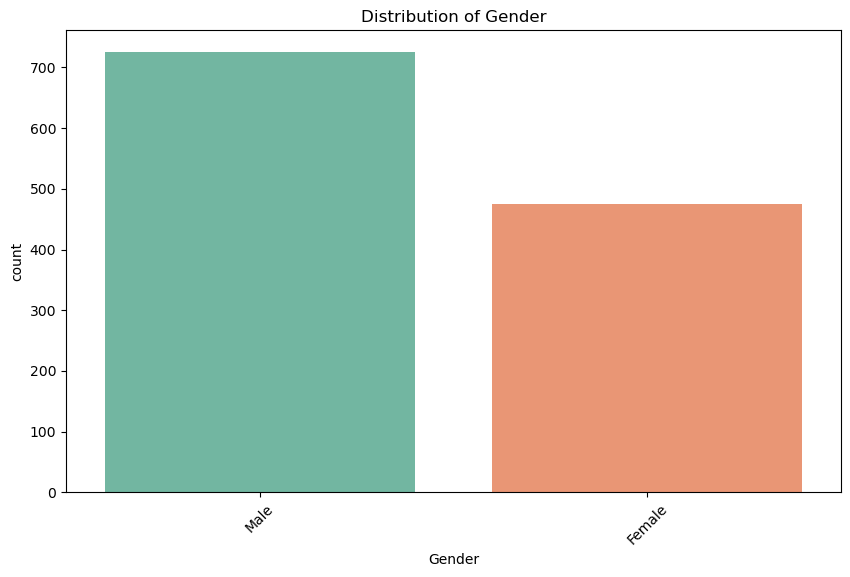

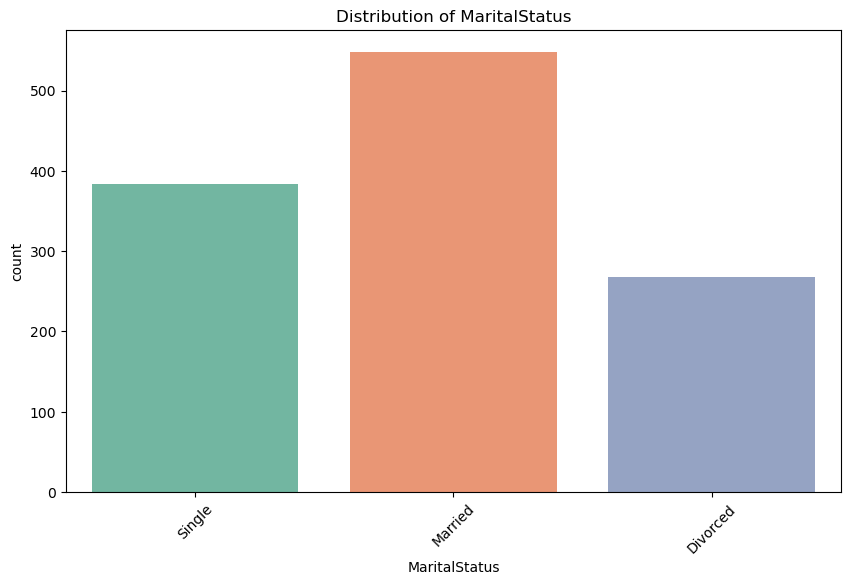

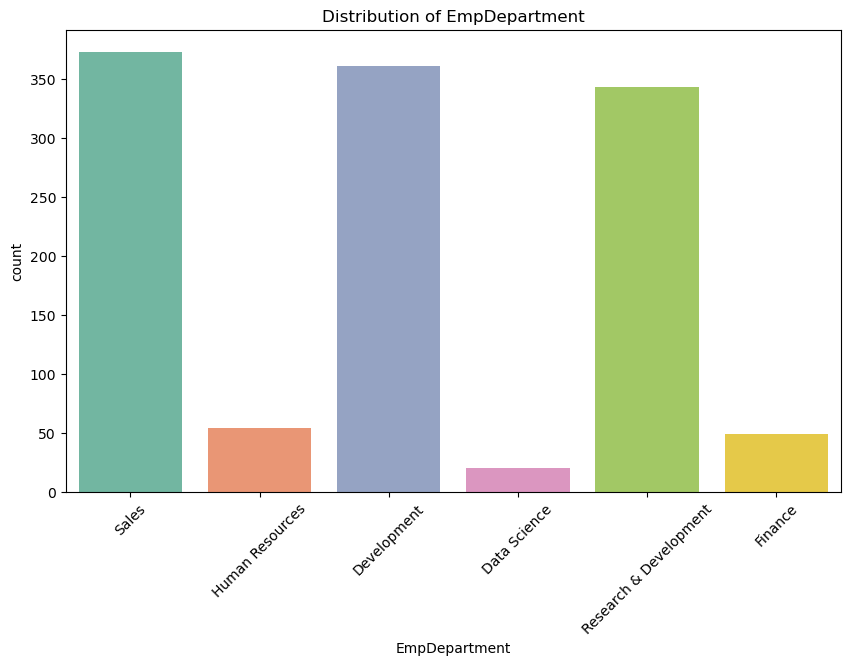

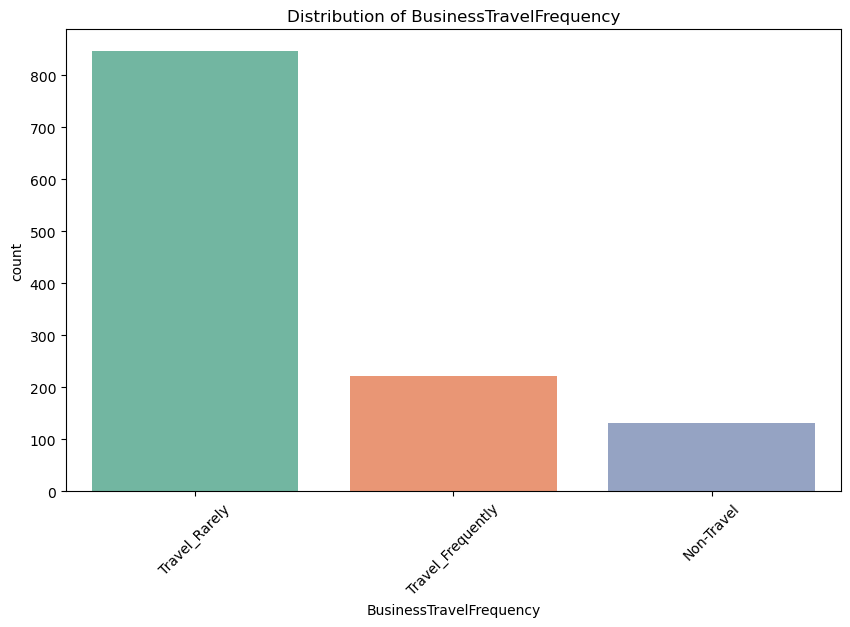

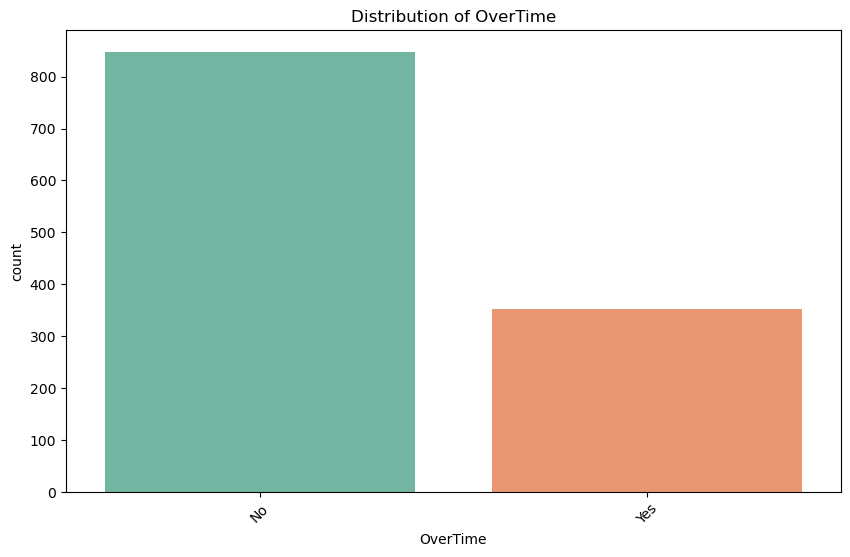

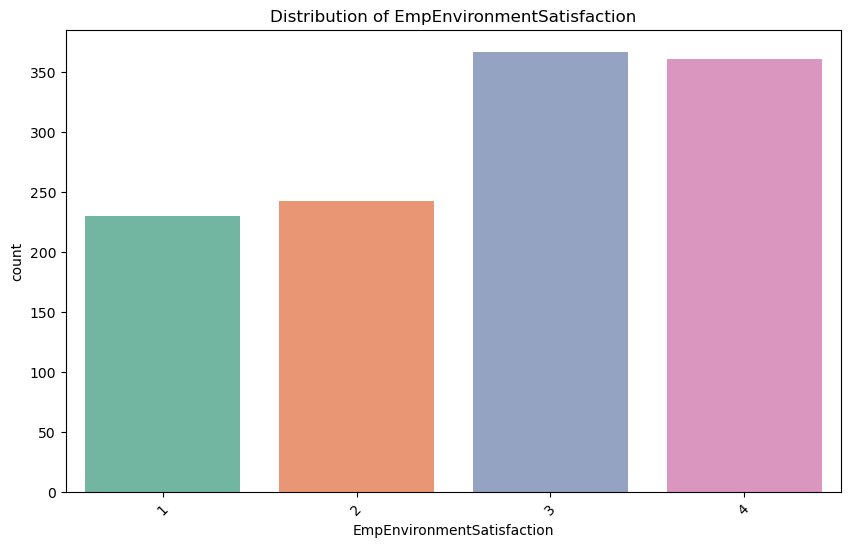

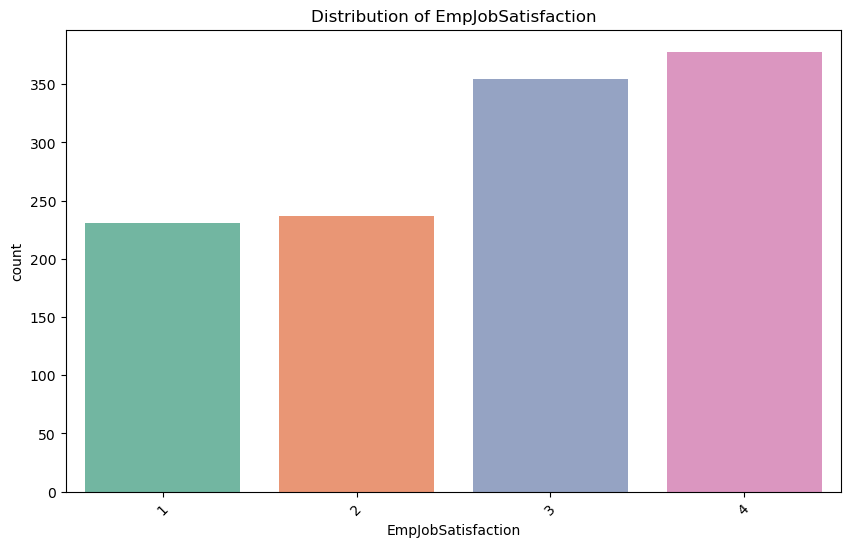

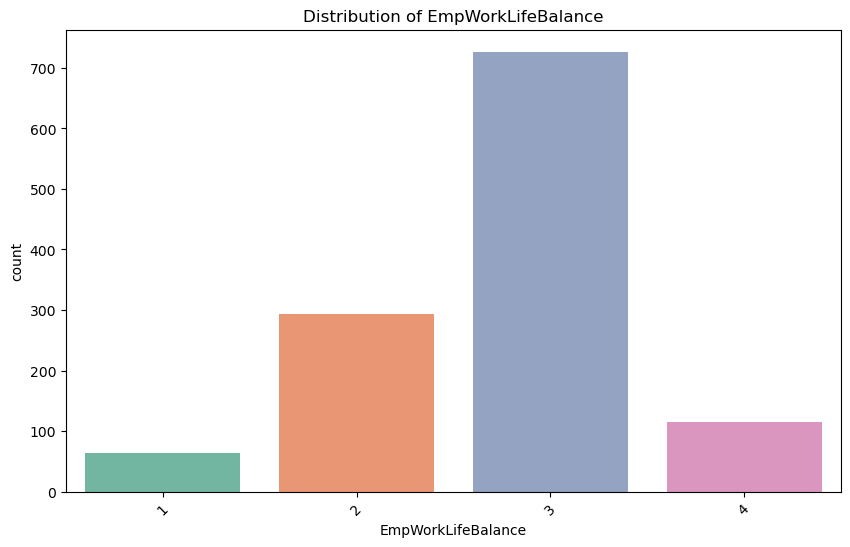

In [22]:
for col in df1.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()




**Gender:** Male employees outnumber Female employees, with both genders primarily falling under Performance Rating 3, suggesting a gender imbalance in the workforce with most employees performing at an average level.  

**MaritalStatus:** Married employees dominate with Performance Rating 3, indicating they form the majority of the workforce, while Single and Divorced employees show a more balanced spread across ratings.  

**EmpDepartment:** Most of the employees prefer to be in sales , development and R&D department on the other hand Human resources , data science and finance has lower count. Data science has the lowest number.  

**BusinessTravelFrequency:** the travel frequency of Employees who travels rarely is 4X as compared to those who travel frequently.  

**OverTime:** Most of the employees does not prefer doing overtime only 30% of them are intrested.  

**EmpEnvironmentSatisfaction:** the majority of employees are generally satisfied with their work environment and job role. However, there's a notable decline in satisfaction ratings as we move towards lower levels, indicating potential areas for improvement in these aspects.  

**EmpJobSatisfaction:** The distribution of employee job satisfaction and work-life balance shows a slight positive skew, with more employees reporting higher levels of satisfaction and balance.  

**EmpWorkLifeBalance:** The distribution of employee work-life balance is skewed towards the higher end of the scale. This suggests that a majority of employees feel a good balance between their work and personal lives. However, there's a smaller proportion of employees who report lower levels of work-life balance.  

---

## Univariate analysis for continuous columns

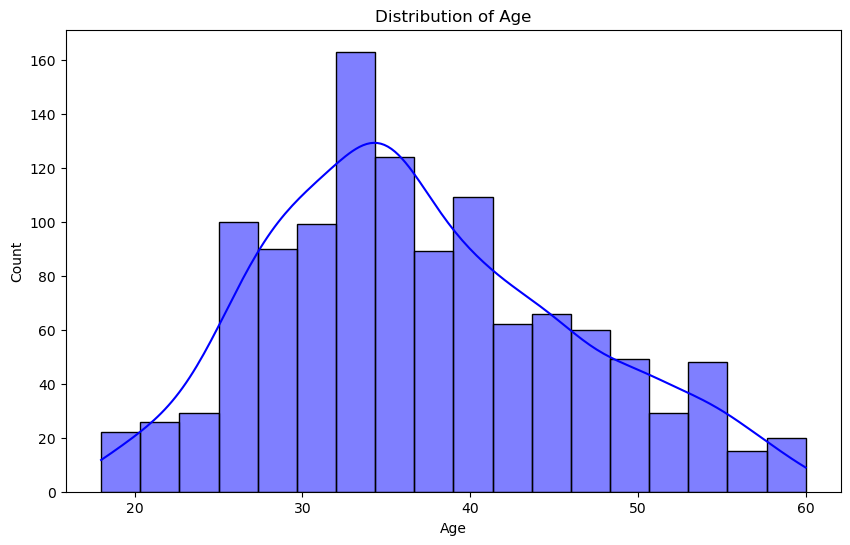

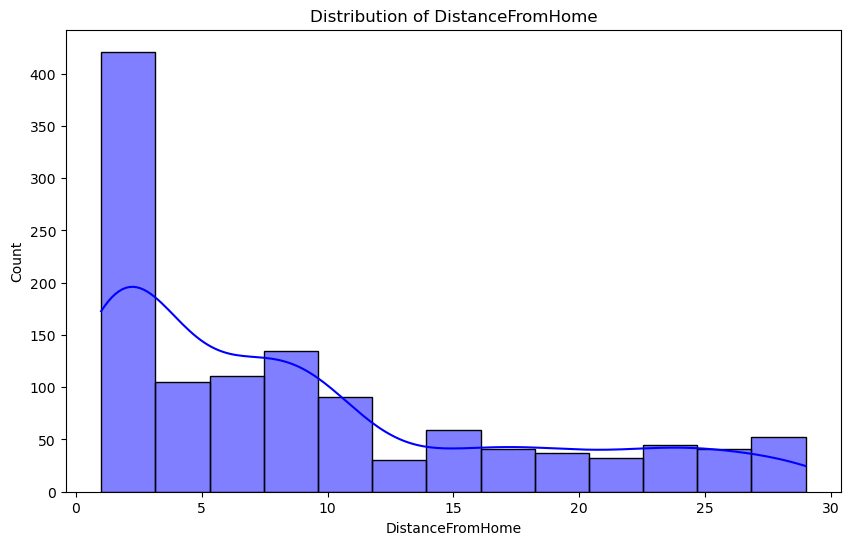

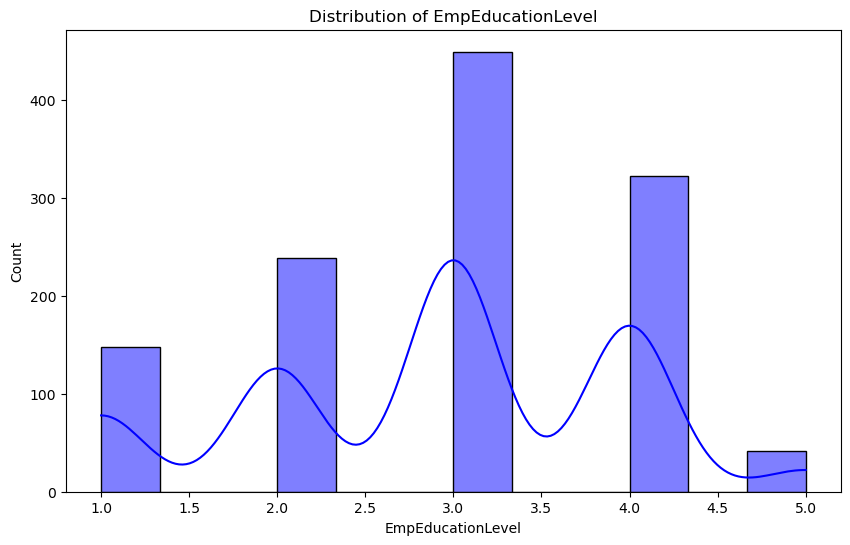

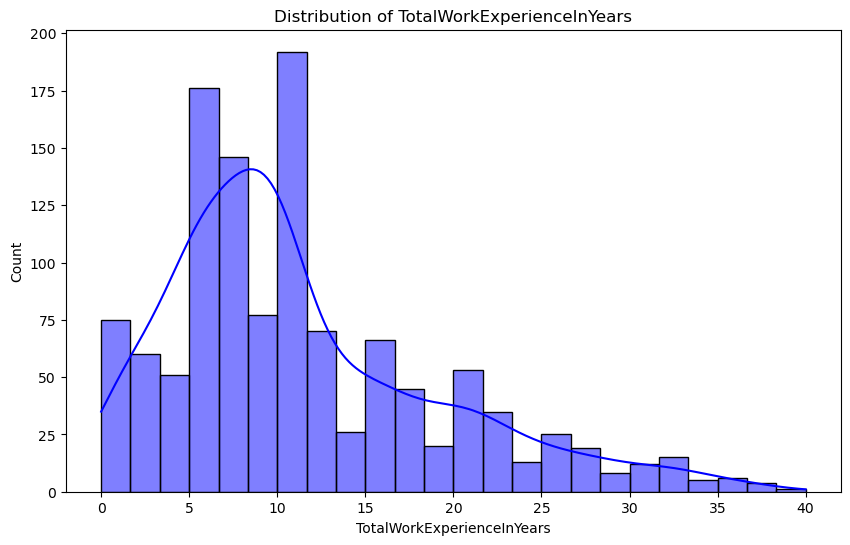

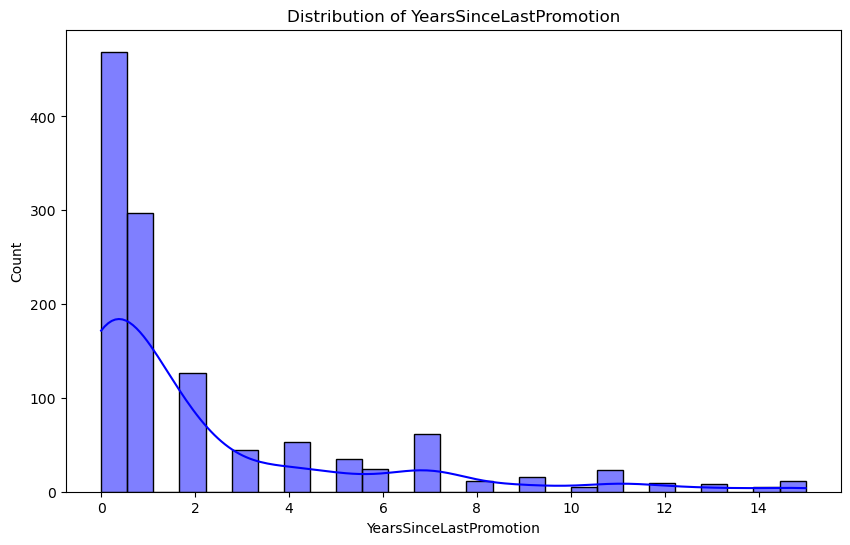

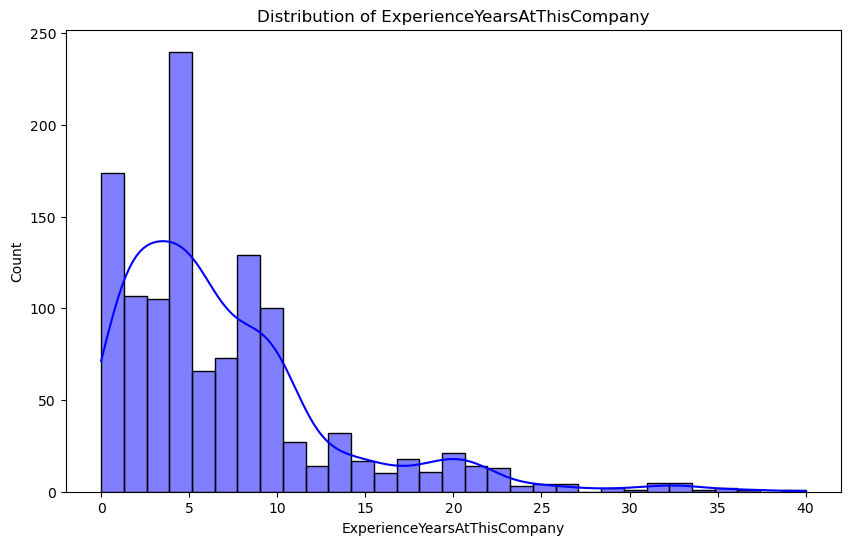

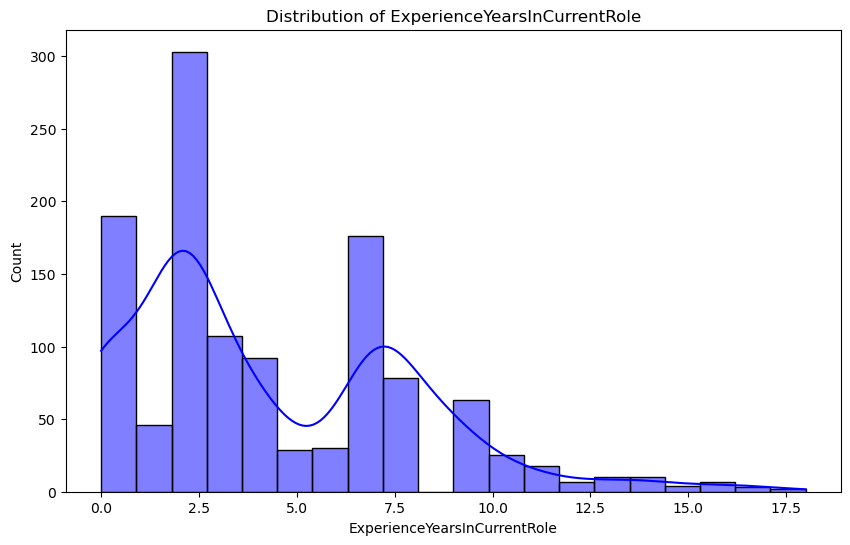

In [25]:
for col in df2.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df2, x=col, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

**Age:** Most of the employees comes under the age between 30 40 age group.  

**DistanceFromHome:** The distribution of distance from home is right-skewed, indicating most employees live closer to their workplace.  

**EmployeeEducationlLevel:** It is multimodal, with peaks around 1.5, 3.0, and 4.0. This suggests that there are distinct groups of employees with different levels of education, possibly reflecting different job roles or hiring practices.  

**TotalWorkExpInYears:** the graph is indicating that most employees have fewer years of experience, with a smaller number of employees having significantly more experience.  

**YearsSinceLastPromotion:** majority of employees have been promoted recently, while a smaller number of employees have not been promoted for a longer period. This might suggest potential areas for improvement in the company's promotion policies or practices.  

**ExperienceYearsAtThisCompany:** It is right-skewed, indicating that most employees have been with the company for a shorter period, while a smaller number of employees have been with the company for significantly longer.  

**ExperienceYearsInCurrentRole:** with a peak around 2 years. This indicates that a significant number of employees have recently transitioned into their current roles, while a smaller number have been in their current roles for a longer period.  

---

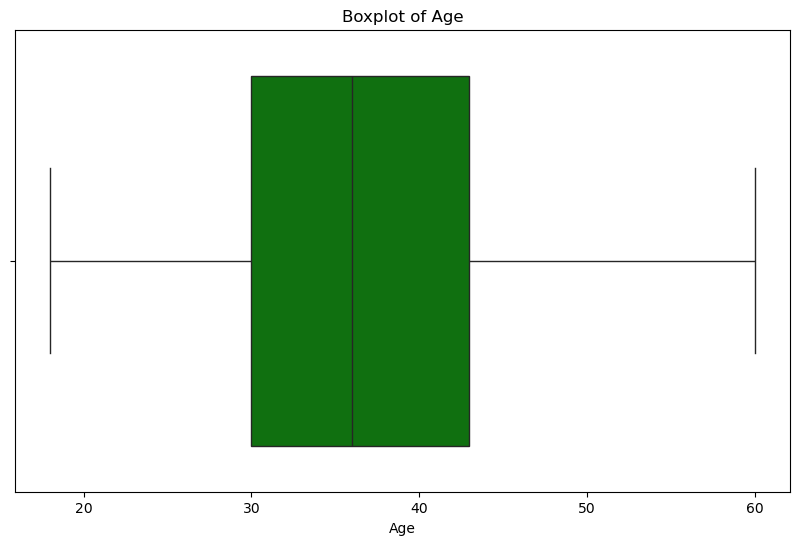

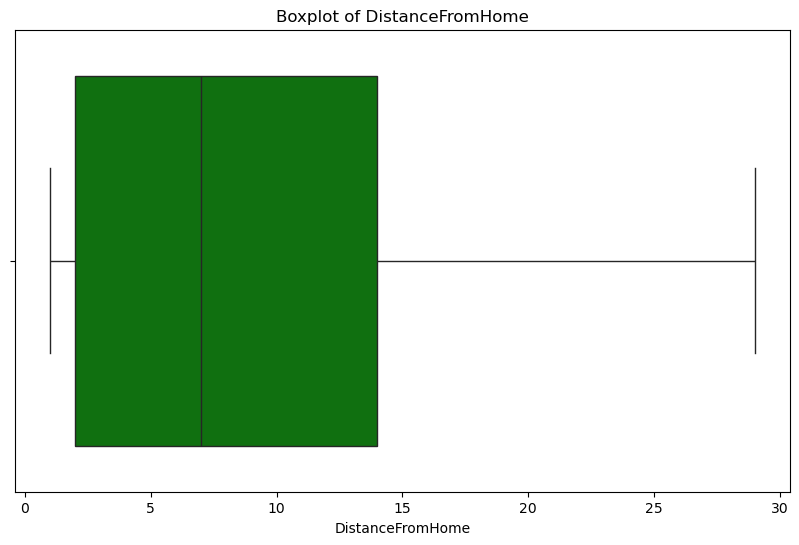

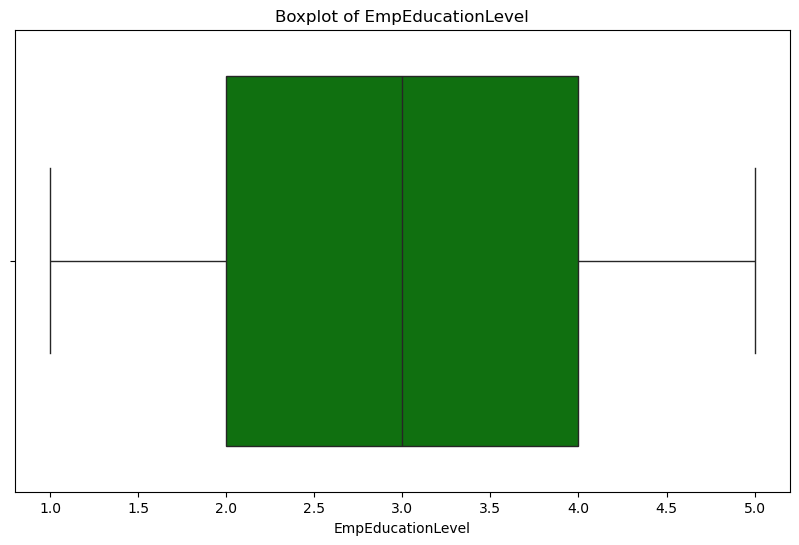

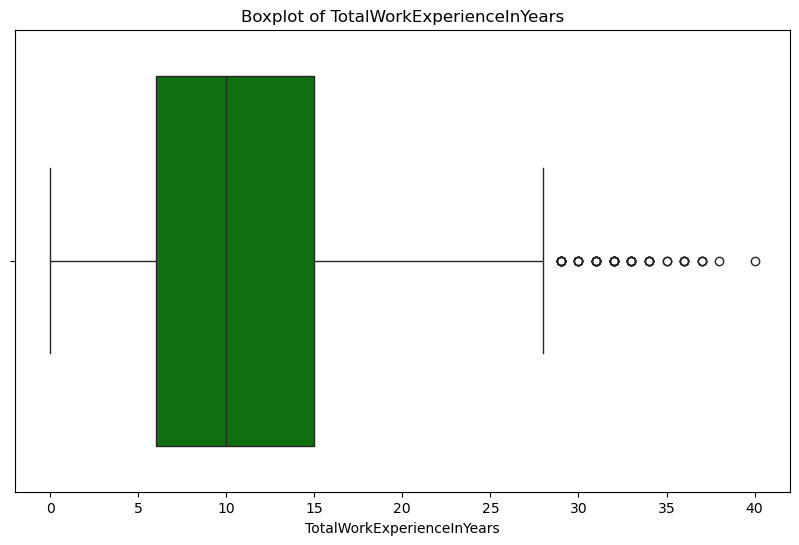

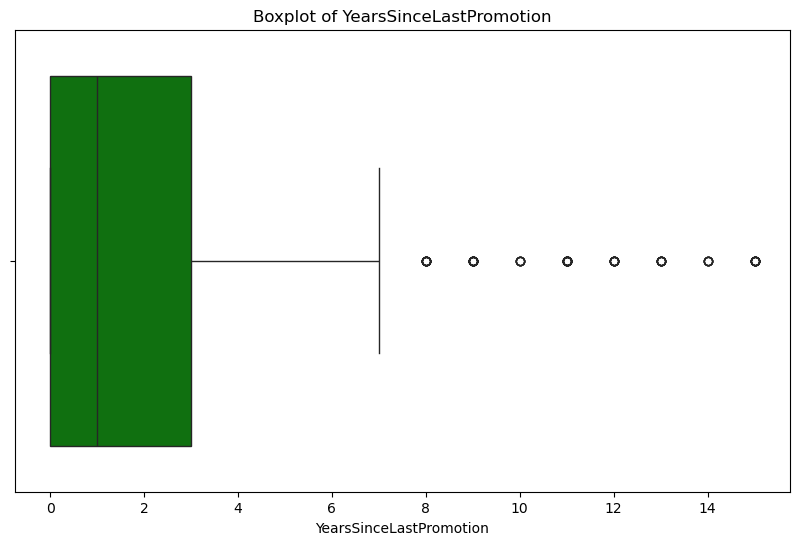

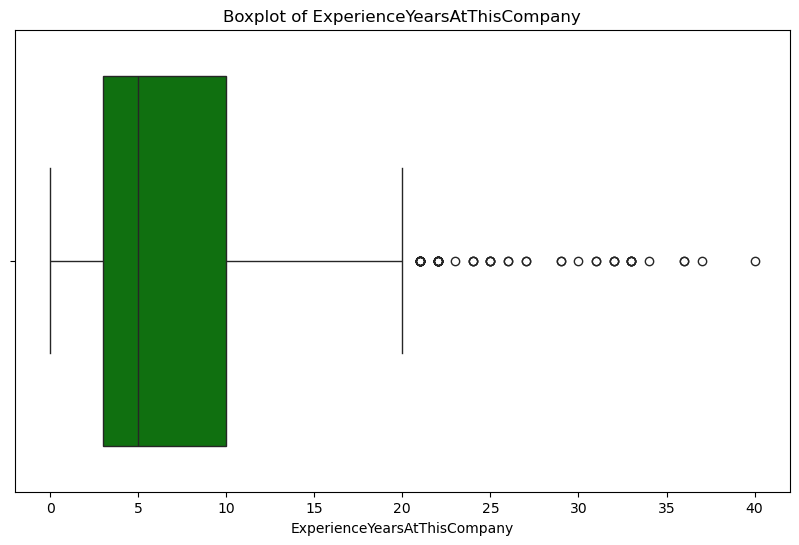

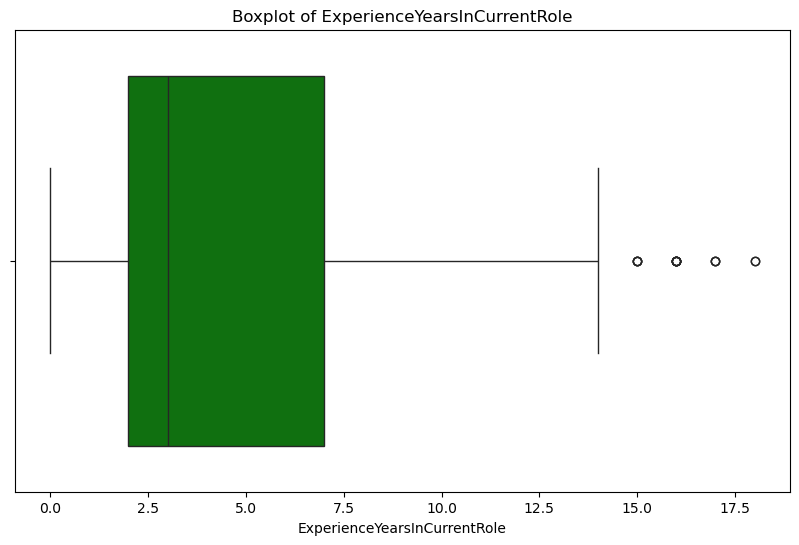

In [27]:
for col in df2.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, color='green')
    plt.title(f'Boxplot of {col}')
    plt.show()

### Summary of Boxplots:

The boxplots (TotalWorkExperienceInYears, YearsSinceLastPromotion, ExperienceYearsAtThisCompany, and ExperienceYearsInCurrentRole) exhibit a similar pattern:

Right Skew: The distributions lean towards higher values, indicating a longer tail on the right side.
Outliers: There are outliers present in the right tail of each boxplot, suggesting individuals with significantly higher experience compared to the majority.  

Removing outliers discards real data points, which might be valuable in understanding the full range of work experience. If the outliers represent a legitimate subgroup with unique characteristics, removing them could distort the overall picture.  

The presence of outliers in all three boxplots indicates a diverse range of experience levels within the dataset. Retaining these outliers provides a more accurate representation of the data and allows for a deeper understanding of the full spectrum of experience.  

---

## Bivariate analysis for categorical columns

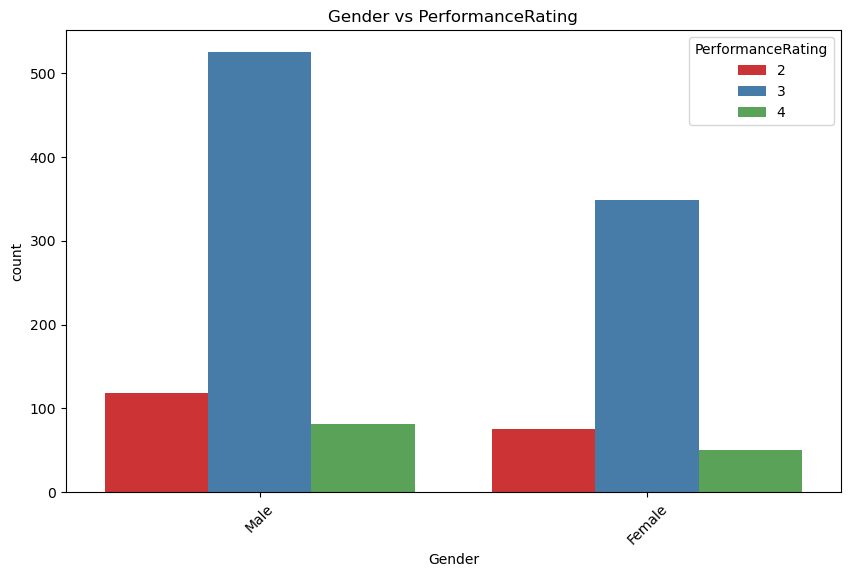

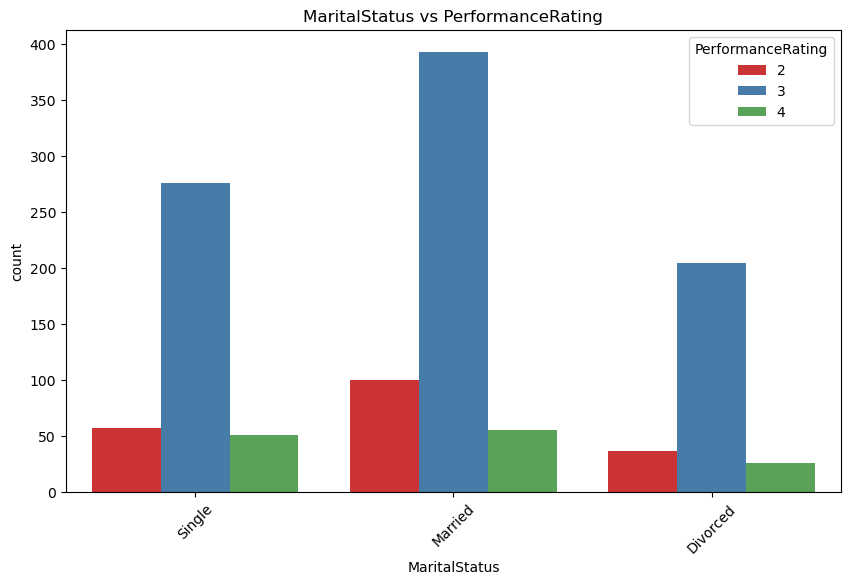

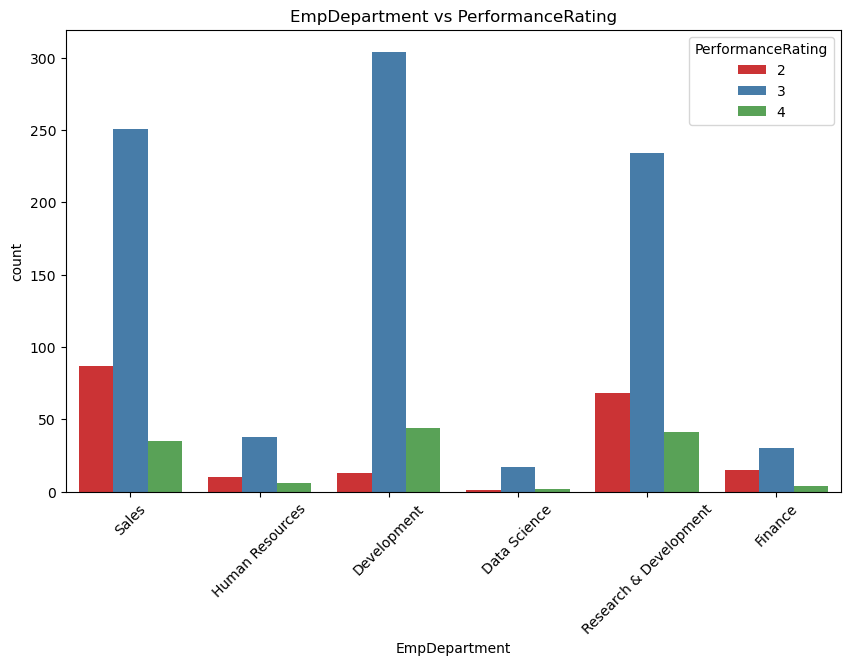

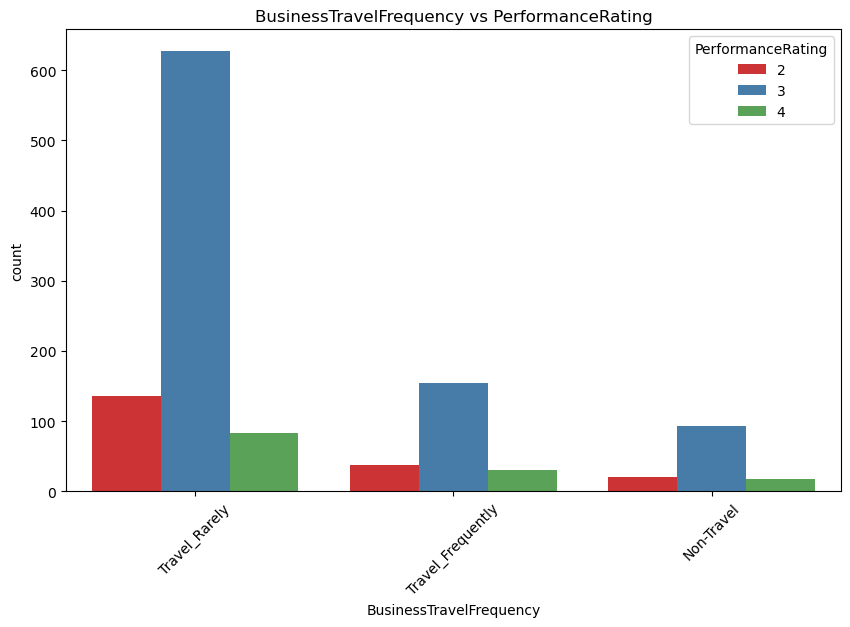

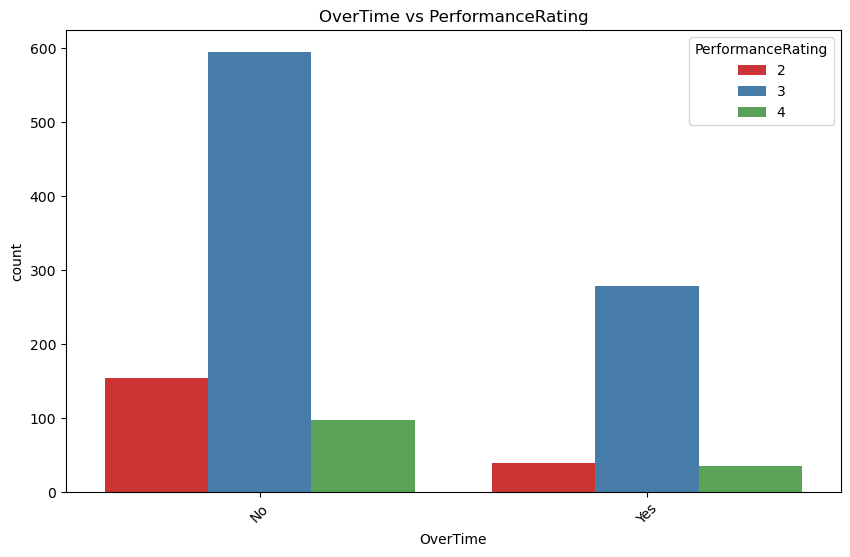

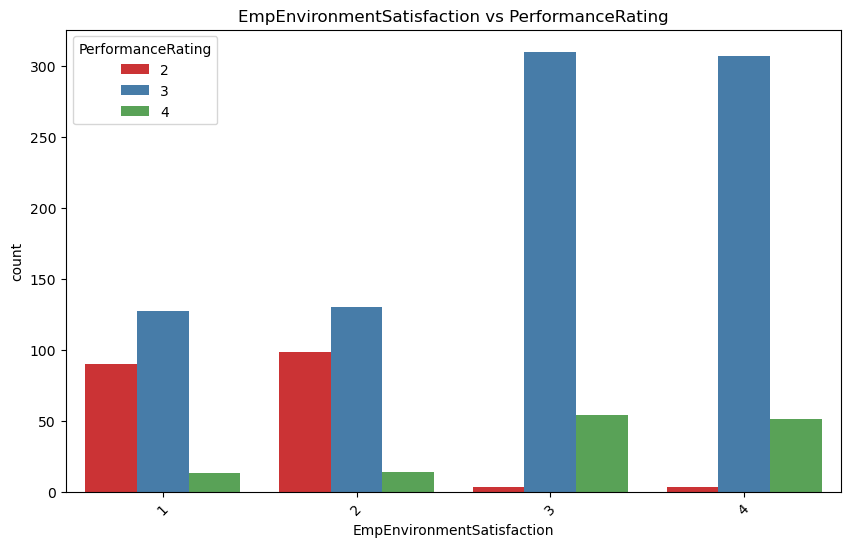

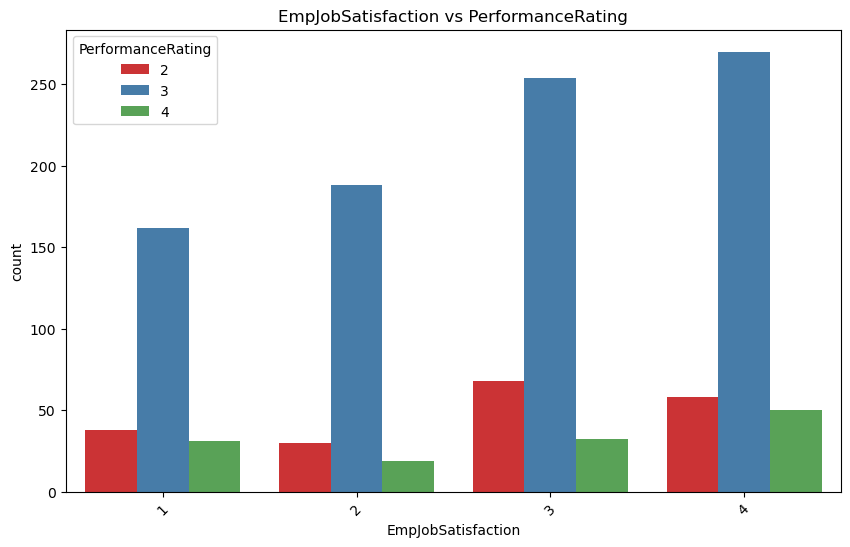

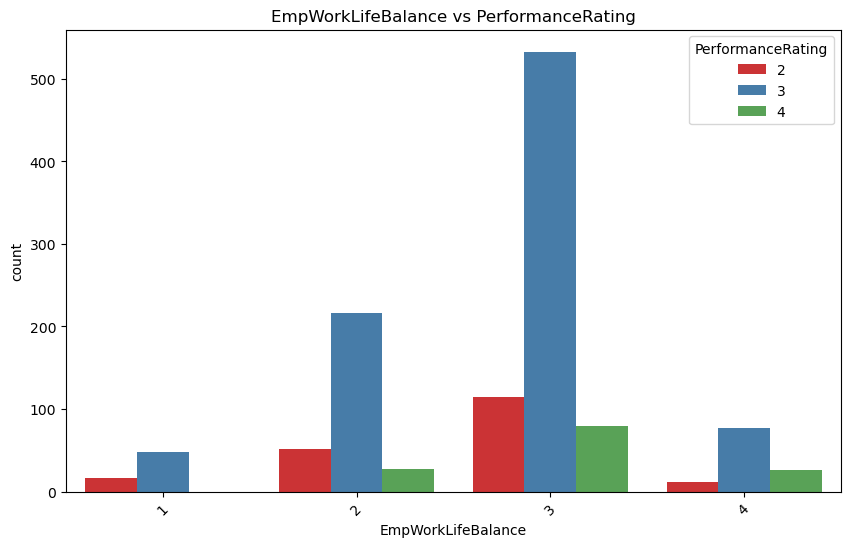

In [30]:
for col in df1.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='PerformanceRating', palette='Set1')
    plt.title(f'{col} vs PerformanceRating')
    plt.xticks(rotation=45)
    plt.show()


**Gender:** The graph suggests a potential gender disparity in attrition rates, with female employees exhibiting a higher propensity to leave the company compared to male employees.  

**MaritialStatus:** The graph indicates that married employees are more likely to stay with the company, while single and divorced employees have higher attrition rates.  

**EmpDepartment:** the "Development" department has the highest number of employees with a performance rating of 3. The "Sales" and "Research & Development" departments also have a significant number of employees with this rating. The "Human Resources" and "Finance" departments have the lowest number of employees with a performance rating of 3.  

**BusinessTravelFrequency:** Employees who travel rarely receive the highest performance ratings, while non-travelers have the lowest. Those who travel frequently have an intermediate level of performance.  

**Overtrime:** Employees who don't work overtime have a higher number of performance ratings, with a significant number receiving the highest rating (4). Those who work overtime have a lower number of ratings overall.  

**EmpEnvironmentSatisfaction:** The graph shows a clear relationship between employee environment satisfaction and performance rating. As employee satisfaction increases, the number of higher performance ratings (3 and 4) also increases.  

**EmpJobSatisfaction:** Employees with higher job satisfaction tend to have higher performance ratings. This suggests a strong correlation between job satisfaction and performance.  

**EmpWorkLifeBalance:** Employees with a higher work-life balance tend to have higher performance ratings. This suggests a strong correlation between work-life balance and performance.  

---

## Bivariate analysis for continuous columns

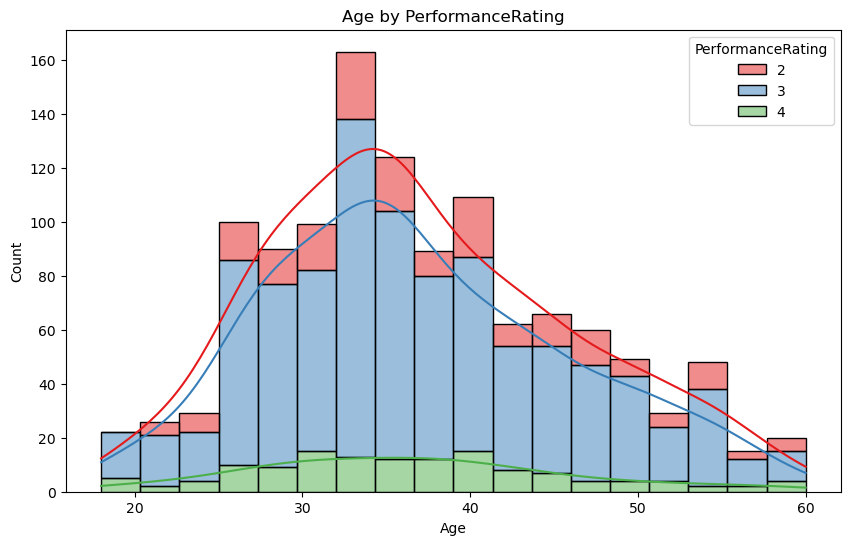

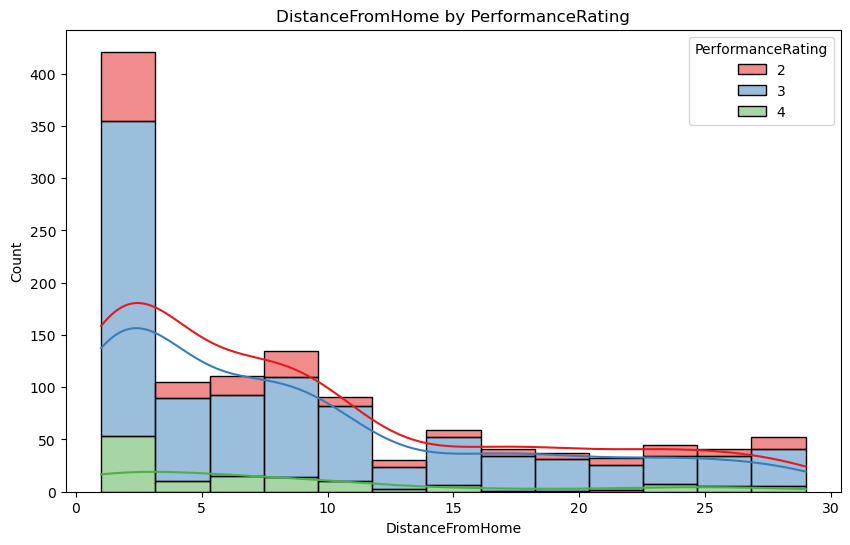

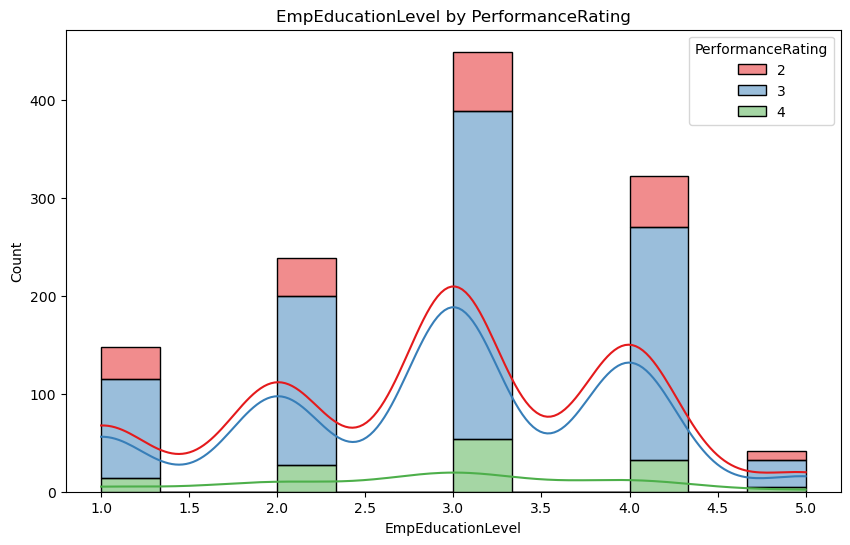

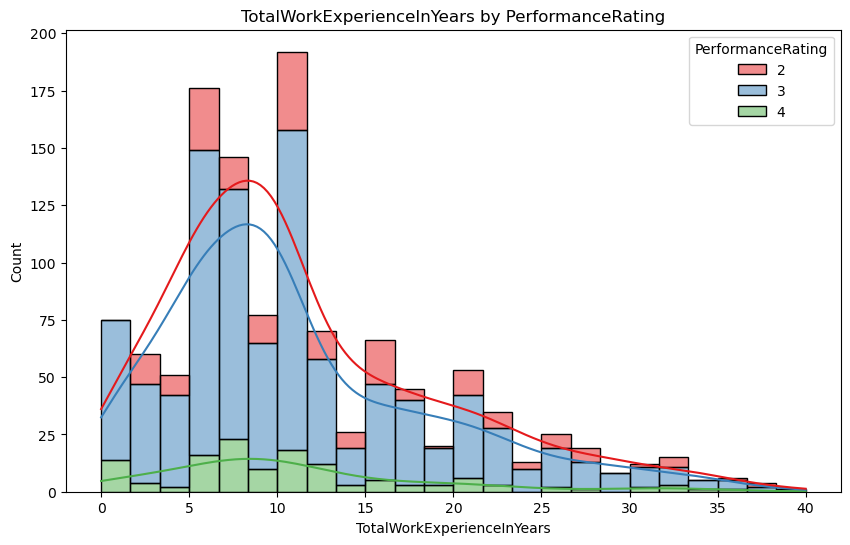

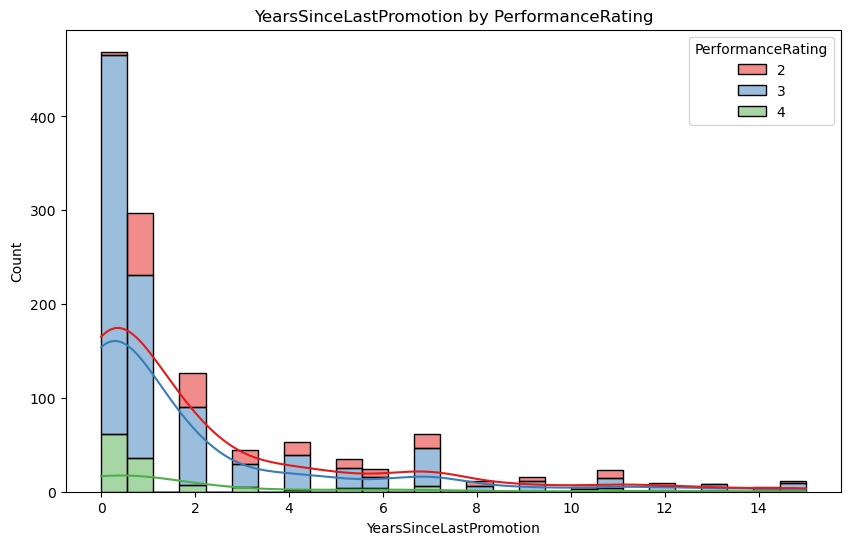

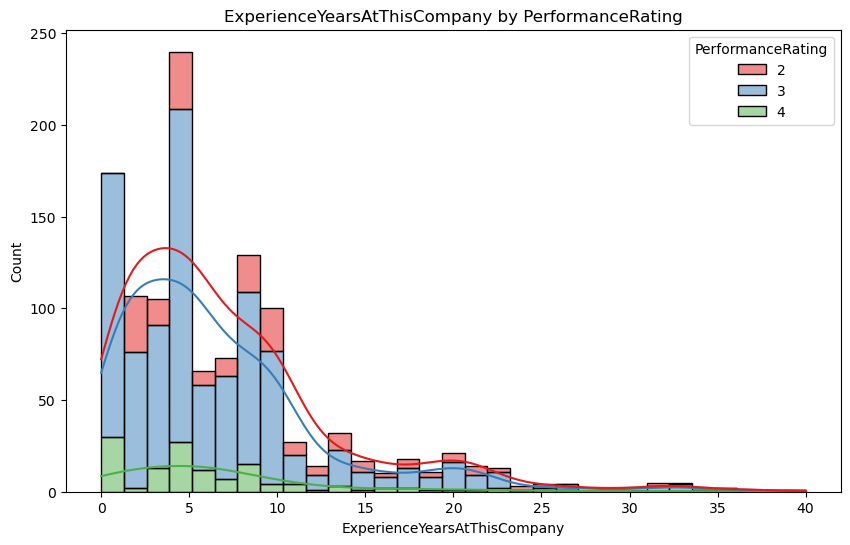

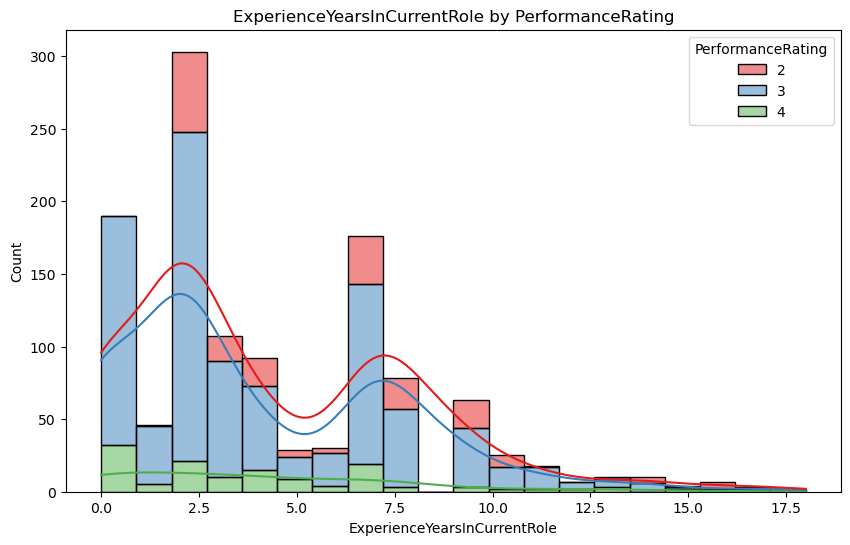

In [33]:
# Bivariate analysis using histplot for continuous columns
for col in df2.columns:
    plt.figure(figsize=(10, 6))
    
    sns.histplot(data=df, x=col, hue='PerformanceRating', kde=True, multiple="stack", palette="Set1")
    plt.title(f'{col} by PerformanceRating')
    plt.show()


**Age:** a slight increase in higher ratings (3 and 4) for the age group 35-40. This suggests that age may not be a significant factor influencing performance.  

**DistanceFromHome:** Employees living closer to the workplace (within 5 miles) tend to have a higher proportion of lower performance ratings (2). As the distance from home increases, the distribution of performance ratings becomes more balanced, with a higher proportion of higher ratings (3 and 4) for those living 15-20 miles away.  

**EmployeeEducationlLevel:** Employees with higher education levels (3.5 - 4.0) tend to have a higher proportion of higher performance ratings (3 and 4). However, there is also a significant number of employees with lower education levels (1.0 - 1.5) who have high performance ratings.  

**TotalWorkExpInYears:** Employees with very low (0-5 years) or very high (30-40 years) experience tend to have a higher proportion of lower performance ratings (2). Employees with moderate experience levels (10-20 years) have a more balanced distribution of performance ratings, with a higher proportion of higher ratings (3 and 4).  

**YearsSinceLastPromotion:** Employees who have been promoted recently (0-2 years) tend to have a higher proportion of higher performance ratings (3 and 4). As the years since last promotion increase, the proportion of higher ratings decreases.  

**ExperienceYearsAtThisCompany:** Employees with moderate experience (5-15 years) tend to have a higher proportion of higher performance ratings (3 and 4). Employees with very low (0-5 years) or very high (30-40 years) experience have a higher proportion of lower performance ratings (2).  

**ExperienceYearsInCurrentRole:** Employees with moderate experience (2-5 years) tend to have a higher proportion of higher performance ratings (3 and 4). Employees with very low (0-2 years) or very high (15+ years) experience have a higher proportion of lower performance ratings (2).  

---

# Q1. Department-wise Performances

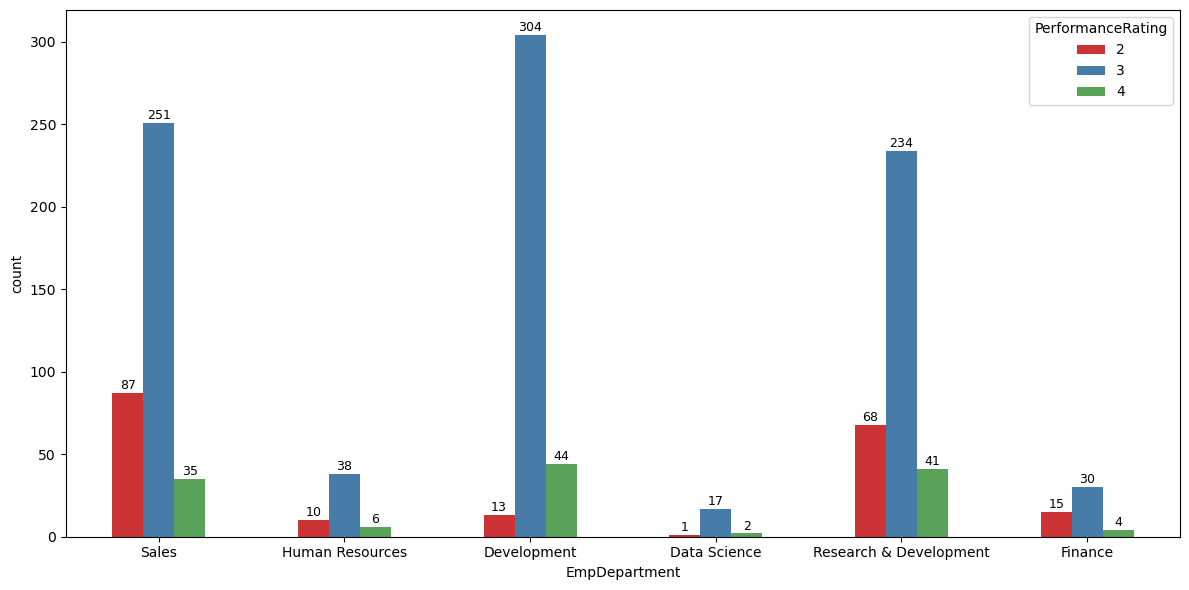

In [36]:
plt.figure(figsize=(12,6))
countplot=sns.countplot(x=df.EmpDepartment,hue=df.PerformanceRating,width=0.5, palette='Set1')

for bar in countplot.patches:
    
    count = int(bar.get_height())
    if count > 0: 
        countplot.text(
            bar.get_x() + bar.get_width() / 2,  
            bar.get_height() + 0.5,            
            f'{count}',                        
            ha='center', va='bottom', fontsize=9
        )

plt.tight_layout()
plt.show()

1. **Top Performing Department**:
   - The **Development** department has the highest number of employees with a performance rating of **3** (304 employees), making it the leading contributor to this category.
   - It also has notable contributions in performance ratings **4** (44 employees) and **2** (13 employees), indicating overall strong performance.

2. **Second Best Department**:
   - The **Research & Development** department follows with a significant number of employees achieving a performance rating of **3** (234 employees).
   - Additionally, this department has a higher count of employees with performance ratings **2** (68 employees) and **4** (41 employees), suggesting a diverse performance distribution.

3. **Moderate Performance Departments**:
   - The **Sales** department has a decent number of employees with a performance rating of **3** (251 employees). However, its count for performance ratings **2** (87 employees) and **4** (35 employees) indicates room for improvement compared to **Development** and **Research & Development**.

4. **Low Performing Departments**:
   - **Human Resources** and **Finance** departments have relatively lower employee counts across all performance categories, with **Human Resources** having the lowest in performance rating **4** (6 employees).
   - The **Data Science** department has the smallest presence overall, with only 17 employees in performance rating **3**, 1 in **2**, and 2 in **4**.

5. **Opportunities for Growth**:
   - Departments like **Human Resources**, **Finance**, and **Data Science** need focused strategies to improve employee performance, particularly in ratings **3** and **4**, to match the performance levels of **Development** and **Research & Development**.

6. **Performance Rating Distribution**:
   - Performance rating **3** dominates across most departments, indicating that the majority of employees achieve this level.
   - Ratings **2** and **4** have significantly fewer employees, suggesting potential improvement areas for underperforming and high-potential employees.

---


# Q2. Top 3 Important Factors Affecting Employee Performance:

Based on My analysis from the overall data, below are the Top 3 Factors that I think are Important for the Employee overall performance.

1. **EmpJobSatisfaction**:  
   Job satisfaction is a critical determinant of employee performance. When employees feel that their role is meaningful, aligns with their skills, and offers opportunities for growth, they are more likely to engage with their work and strive for excellence. A fulfilling job often fosters intrinsic motivation, which is vital for sustained productivity. On the contrary, dissatisfaction can lead to low morale, lack of initiative, and even absenteeism. Factors contributing to job satisfaction include fair compensation, recognition of achievements, clear career progression paths, and the alignment of the employee’s role with their professional aspirations. Companies that prioritize improving job satisfaction see a direct positive impact on both individual and organizational performance.

2. **EmpEnvironmentSatisfaction**:  
   A positive and supportive work environment plays a significant role in boosting employee morale and productivity. Employees who work in a clean, safe, and collaborative environment feel more valued and comfortable, leading to better focus and creativity. Factors such as ergonomic office setups, effective communication channels, and a culture of mutual respect significantly enhance environment satisfaction. Conversely, toxic workplace dynamics, lack of resources, and poorly managed workspaces can hinder performance. Organizations that invest in creating a supportive environment often see higher retention rates and improved teamwork, which directly contribute to better overall employee performance.

3. **EmpWorkLifeBalance**:  
   Achieving a healthy work-life balance is essential for sustaining long-term performance. Employees who can manage their personal and professional responsibilities effectively tend to be more focused, energized, and less prone to burnout. Work-life balance not only enhances productivity but also positively affects mental health, reducing stress levels and promoting overall well-being. Flexible working hours, remote work opportunities, and encouraging time off for personal commitments are strategies that organizations can adopt to improve this balance. Employees who feel supported in managing their personal lives alongside their careers are more likely to show loyalty, commitment, and improved performance at work.

---

## Data Preprocessing

**To Convert Categorical Data to Numerical we use Encoding**

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Attrition'] = le.fit_transform(df['Attrition'])
df['Gender'] = le.fit_transform(df['Gender'])
df['EducationBackground'] = le.fit_transform(df['EducationBackground'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['EmpDepartment'] = le.fit_transform(df['EmpDepartment'])
df['EmpJobRole'] = le.fit_transform(df['EmpJobRole'])
df['BusinessTravelFrequency'] = le.fit_transform(df['BusinessTravelFrequency'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['PerformanceRating'] = le.fit_transform(df['PerformanceRating'])


In [42]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,1
1,E1001006,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,1
2,E1001007,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,2
3,E1001009,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,1
4,E1001010,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,1


**Large differences in magnitude of data can lead to one feature dominating others. To overcome this we use Scaling technique.  
For our data we will use StandardScaler**

In [44]:
from sklearn.preprocessing import StandardScaler
continuous_columns = ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 
                      'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 
                      'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 
                      'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 
                      'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 
                      'YearsSinceLastPromotion', 'YearsWithCurrManager']

scaler = StandardScaler()
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,-0.541458,1,2,2,5,13,2,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,0,-0.889111,1.185833,-0.170645,-0.622235,-1.064491,0.468778,0.749766,-0.681372,1.100251,0,1
1,E1001006,1.109888,1,2,2,5,13,2,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,0,-0.889111,1.185833,1.112397,-0.622235,0.365956,-0.012431,0.749766,-0.370834,0.817773,0,1
2,E1001007,0.339260,1,1,1,5,13,1,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1,1.594054,0.255768,1.112397,-0.622235,0.365956,1.752001,2.410786,-0.370834,2.230163,0,2
3,E1001009,0.449349,1,0,0,3,8,2,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,0,-0.061389,-0.674297,1.497310,-0.622235,-1.064491,2.233210,0.472929,3.045084,0.535296,0,1
4,E1001010,2.541054,1,2,2,5,13,2,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,0,-0.337297,1.185833,-0.170645,-1.414051,0.365956,-0.814446,-0.634417,-0.060296,-0.594616,0,1


In [45]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,-0.541458,1,2,2,5,13,2,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,0,-0.889111,1.185833,-0.170645,-0.622235,-1.064491,0.468778,0.749766,-0.681372,1.100251,0,1
1,E1001006,1.109888,1,2,2,5,13,2,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,0,-0.889111,1.185833,1.112397,-0.622235,0.365956,-0.012431,0.749766,-0.370834,0.817773,0,1
2,E1001007,0.339260,1,1,1,5,13,1,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1,1.594054,0.255768,1.112397,-0.622235,0.365956,1.752001,2.410786,-0.370834,2.230163,0,2
3,E1001009,0.449349,1,0,0,3,8,2,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,0,-0.061389,-0.674297,1.497310,-0.622235,-1.064491,2.233210,0.472929,3.045084,0.535296,0,1
4,E1001010,2.541054,1,2,2,5,13,2,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,0,-0.337297,1.185833,-0.170645,-1.414051,0.365956,-0.814446,-0.634417,-0.060296,-0.594616,0,1


In [46]:
df.drop('EmpNumber',axis=1).corr()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,0.051910,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,0.002218,0.010949,-0.050685,0.024680,-0.036675,-0.038410,-0.005319,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,-0.030234,-0.025505,-0.056338,-0.030977,-0.032879,0.007046,-0.009788,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,-0.013540,-0.043355,-0.087359,0.044593,-0.030095,-0.022833,0.010128,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,0.003957,-0.076988,0.100526,0.007150,-0.033950,-0.026841,-0.012661,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,-0.016179,-0.008034,0.004406,0.032916,-0.009111,0.015075,0.005735,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,0.025400,0.016652,0.036360,-0.031236,0.021476,0.032229,-0.041946,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.024940,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,-0.021119,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,0.064270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561


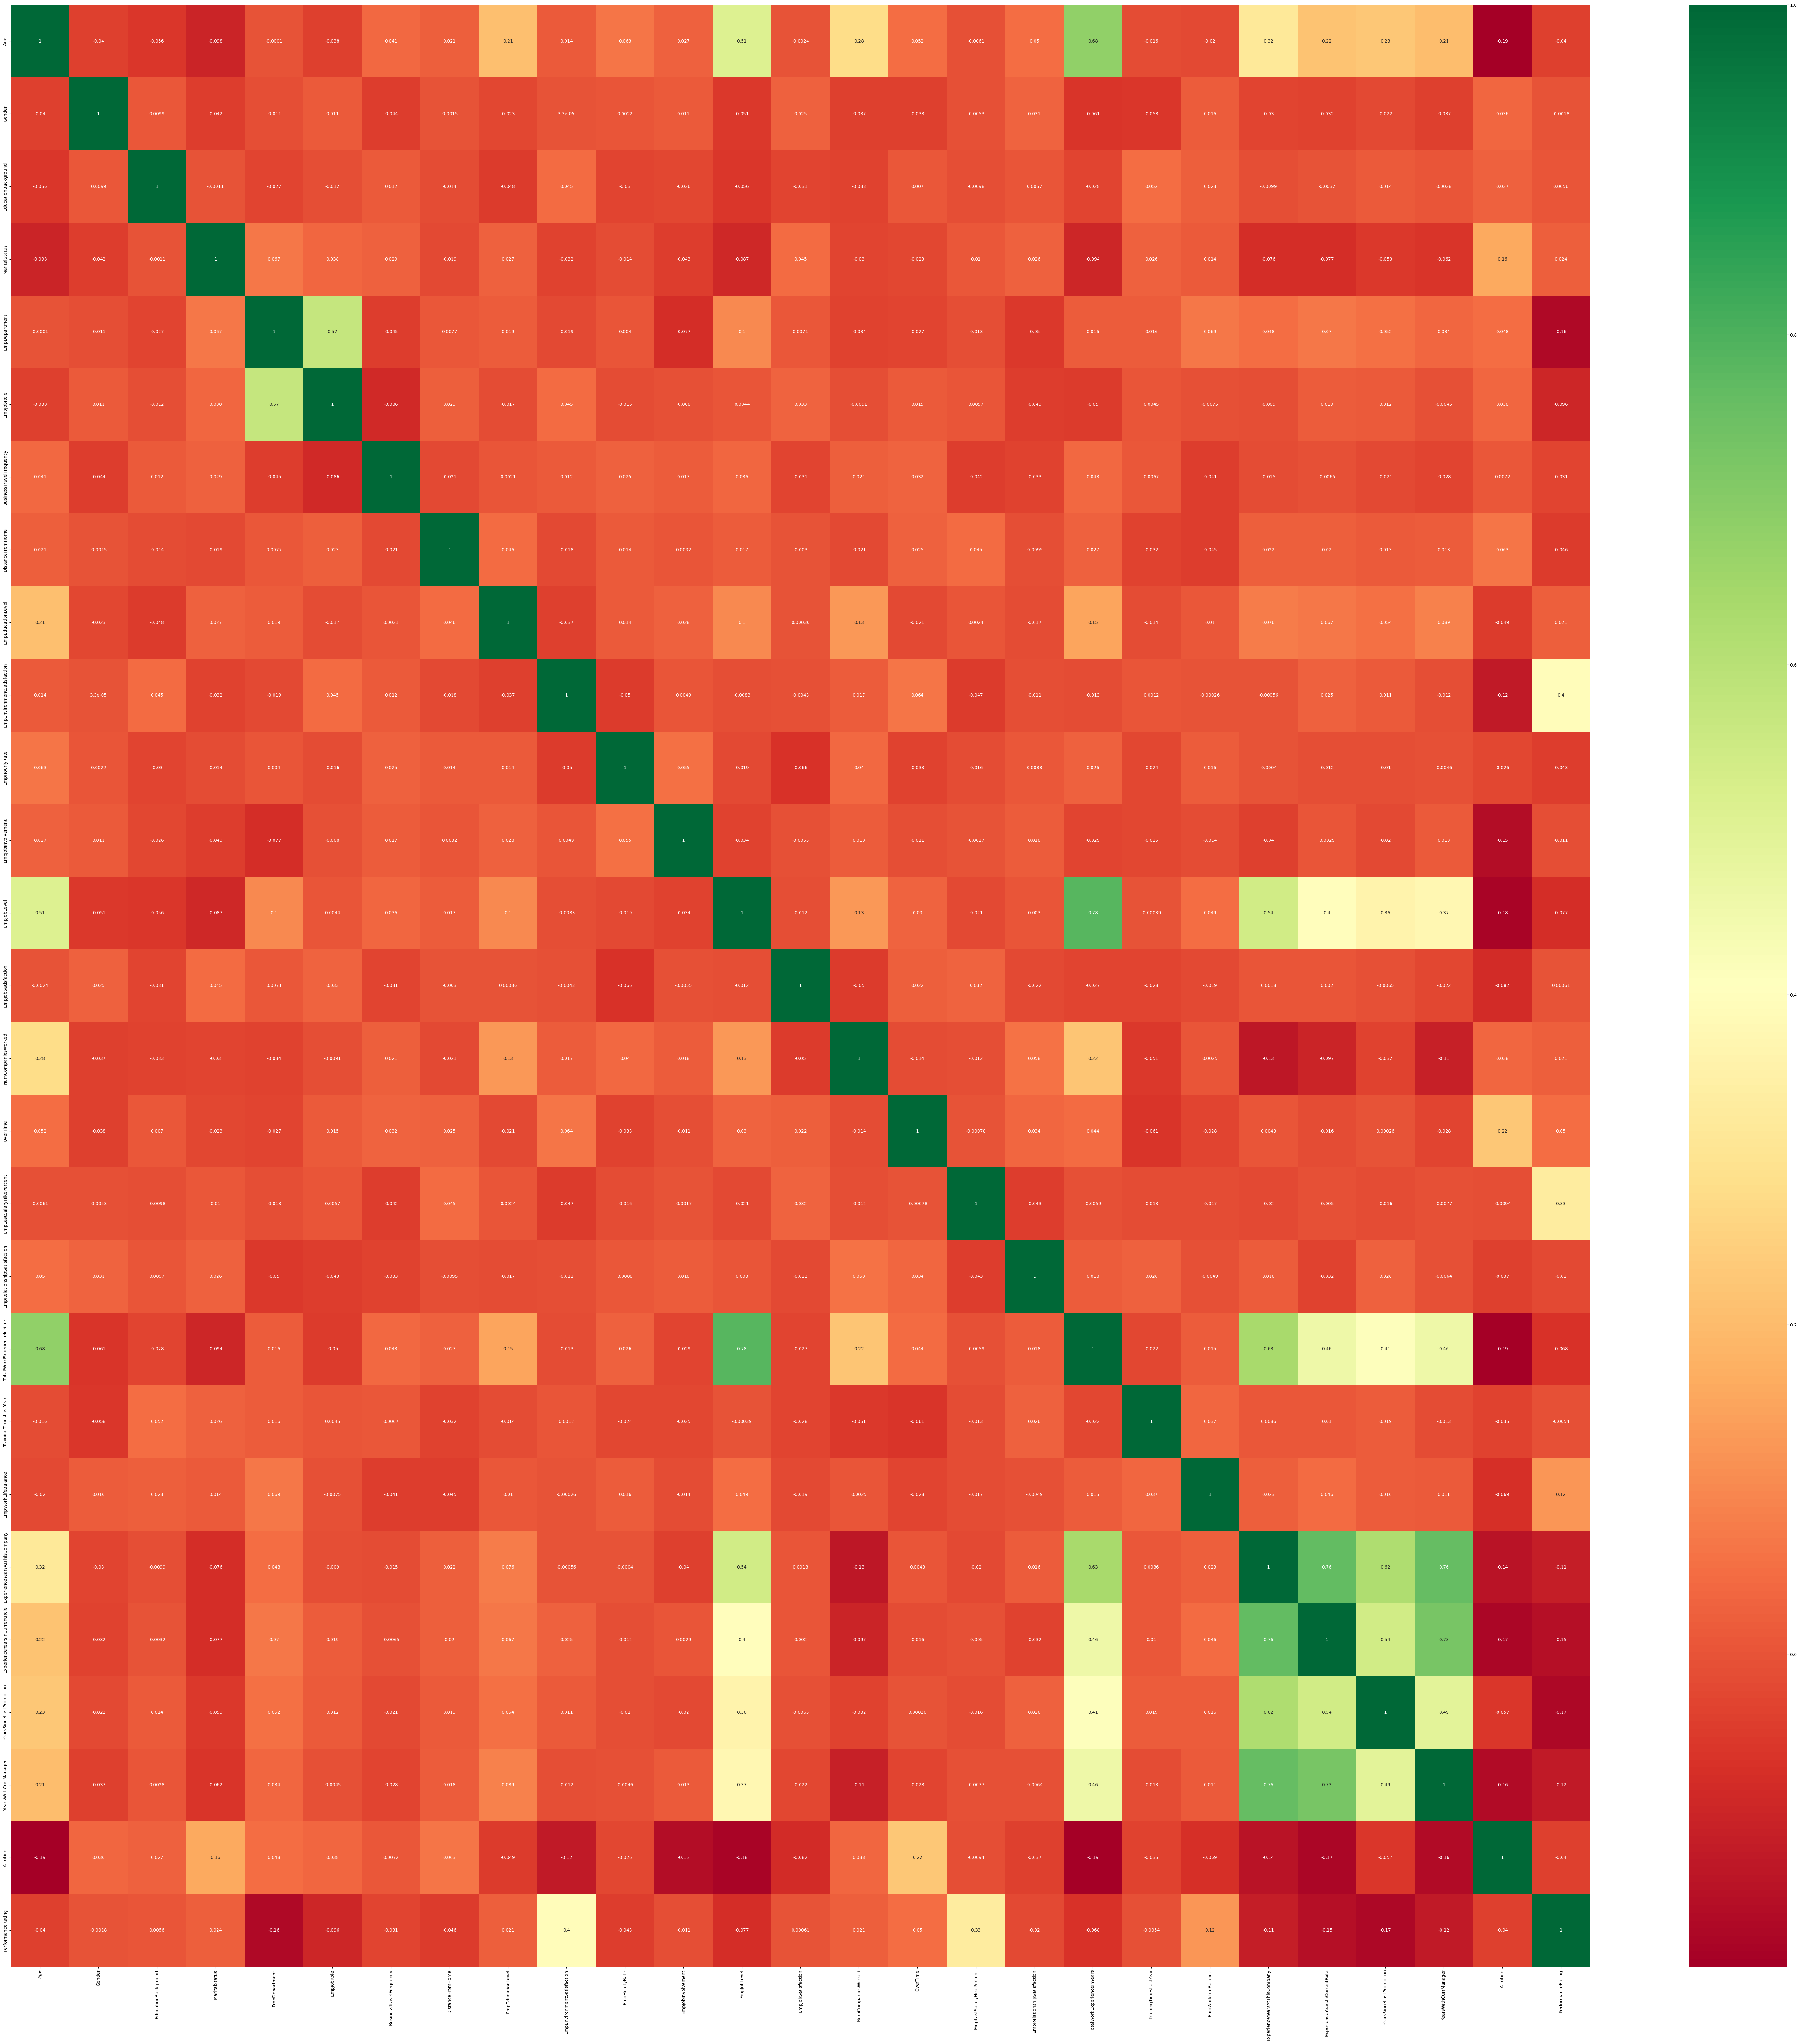

In [47]:
plt.figure(figsize=(80,80))
sns.heatmap(df.drop('EmpNumber',axis=1).corr(),annot=True, cmap='RdYlGn' )
plt.show()

In [48]:
#splitting the data into x and y
x=df.drop(['PerformanceRating','EmpNumber'],axis=1)
y=df['PerformanceRating']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(900, 26)
(900,)
(300, 26)
(300,)


In [51]:
df['PerformanceRating'].value_counts()

PerformanceRating
1    874
0    194
2    132
Name: count, dtype: int64

# Model Creation By Using Logistic_Regression

In [53]:
Log = LogisticRegression(multi_class='ovr')

In [54]:
Log.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [55]:
yp_Log_test=Log.predict(x_test)

In [56]:
yp_Log_train = Log.predict(x_train)

# Model Evaluation Logistic_Regression

In [58]:
accuracy_score(y_test,yp_Log_test) # accuracy score for test data

0.8233333333333334

In [59]:
accuracy_score(y_train,yp_Log_train) # accuracy score for train data

0.8277777777777777

In [60]:
recall_score(y_test,yp_Log_test,average='weighted')

0.8233333333333334

In [61]:
f1_score(y_test,yp_Log_test,average='weighted')

0.8215409883995907

In [62]:
print(f"classification_report for test data : {classification_report(y_test,yp_Log_test)}")
print(f"classification_report for train data : {classification_report(y_train,yp_Log_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.56      0.54      0.55        37
           1       0.88      0.90      0.89       232
           2       0.68      0.61      0.64        31

    accuracy                           0.82       300
   macro avg       0.71      0.68      0.69       300
weighted avg       0.82      0.82      0.82       300

classification_report for train data :               precision    recall  f1-score   support

           0       0.70      0.56      0.62       157
           1       0.85      0.93      0.89       642
           2       0.83      0.56      0.67       101

    accuracy                           0.83       900
   macro avg       0.79      0.69      0.73       900
weighted avg       0.82      0.83      0.82       900



# Model Creation by using KNN-Classifier

In [64]:
# Running the model with different nearest neighbours number to check which will gives us least error rate
err_rate = []
for i in range(1,11):
    knn1 = KNeighborsClassifier(n_neighbors= i)
    knn1.fit(x_train,y_train)
    y_pred1 = knn1.predict(x_test)
    error_rate = (y_test !=y_pred1).sum()/len(y_test) * 100
    err_rate.append(error_rate)
print(err_rate)

[27.333333333333332, 28.666666666666668, 25.0, 25.333333333333336, 21.666666666666668, 23.0, 21.666666666666668, 20.666666666666668, 22.0, 20.333333333333332]


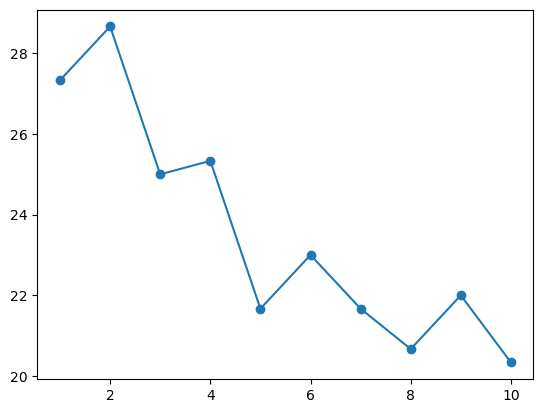

In [65]:
# plotting to check the nearest neighbours with least error rate
plt.plot(range(1,11),err_rate, marker='o')
plt.show()

In [66]:
knn = KNeighborsClassifier(5)

In [67]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [68]:
y_pred_knn = knn.predict(x_test)

In [69]:
y_pred_knn_train = knn.predict(x_train)

# Model Evaluation KNN - Classifier

In [71]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_knn)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_knn_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.50      0.35      0.41        37
           1       0.82      0.94      0.87       232
           2       0.56      0.16      0.25        31

    accuracy                           0.78       300
   macro avg       0.62      0.48      0.51       300
weighted avg       0.75      0.78      0.75       300

classification_report for train data :               precision    recall  f1-score   support

           0       0.71      0.48      0.57       157
           1       0.80      0.96      0.87       642
           2       0.96      0.22      0.35       101

    accuracy                           0.79       900
   macro avg       0.82      0.55      0.60       900
weighted avg       0.80      0.79      0.76       900



**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

## Hyperparameter Tuning - KNN

In [74]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

In [75]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [76]:
grid_search.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [77]:
best_knn_model = grid_search.best_estimator_

In [78]:
knn_pred = best_knn_model.predict(x_test)

In [79]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy of the Best Model:", accuracy)

Accuracy of the Best Model: 0.7933333333333333


In [80]:
print("precision_score for test data:",precision_score(y_test, knn_pred,average='weighted'))

precision_score for test data: 0.7807101449275363


In [81]:
print("recall_score for test data:",recall_score(y_test, knn_pred,average='weighted'))

recall_score for test data: 0.7933333333333333


In [82]:
print("Classification Report for Best KNN Model:")
print(classification_report(y_test, knn_pred))

Classification Report for Best KNN Model:
              precision    recall  f1-score   support

           0       0.57      0.35      0.43        37
           1       0.81      0.95      0.88       232
           2       0.80      0.13      0.22        31

    accuracy                           0.79       300
   macro avg       0.73      0.48      0.51       300
weighted avg       0.78      0.79      0.75       300



# Model creation by using SVM-Classifier

In [84]:
svc = SVC()

In [85]:
svc.fit(x_train,y_train)

SVC()

In [86]:
y_pred_svc = svc.predict(x_test)

In [87]:
y_pred_svc_train = svc.predict(x_train)

# Model Evaluation SVM - Classifier

In [89]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_svc)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_svc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.85      0.30      0.44        37
           1       0.81      0.99      0.89       232
           2       0.67      0.06      0.12        31

    accuracy                           0.81       300
   macro avg       0.77      0.45      0.48       300
weighted avg       0.80      0.81      0.75       300

classification_report for train data :               precision    recall  f1-score   support

           0       0.90      0.40      0.56       157
           1       0.77      0.99      0.87       642
           2       1.00      0.05      0.09       101

    accuracy                           0.78       900
   macro avg       0.89      0.48      0.51       900
weighted avg       0.82      0.78      0.73       900



**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

# Hyperparameter Tuning - SVM

In [92]:
svm_param_grid=param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1],
}


In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
svm_grid_search = GridSearchCV(svc, svm_param_grid, refit = True, verbose = 2,scoring='f1',cv=5)

In [95]:
svm_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='f1', verbose=2)

In [96]:
svm_grid_search.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [97]:
svm_grid_search.best_estimator_

SVC(C=0.1, gamma=0.001, kernel='linear')

In [98]:
svm_best_model=SVC(C=0.1, gamma=0.001, kernel='linear')

In [99]:
svm_best_model.fit(x_train,y_train)

SVC(C=0.1, gamma=0.001, kernel='linear')

In [100]:
svm_pred = svm_best_model.predict(x_test)
svm_pred_train  = svm_best_model.predict(x_train )

# Model evaluation SVM

In [102]:
print(f"classification_report for test data : {classification_report(y_test,svm_pred)}")
print(f"classification_report for train data : {classification_report(y_train,svm_pred_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.54      0.54      0.54        37
           1       0.89      0.89      0.89       232
           2       0.72      0.74      0.73        31

    accuracy                           0.83       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.83      0.83      0.83       300

classification_report for train data :               precision    recall  f1-score   support

           0       0.68      0.55      0.61       157
           1       0.86      0.93      0.89       642
           2       0.86      0.70      0.77       101

    accuracy                           0.84       900
   macro avg       0.80      0.73      0.76       900
weighted avg       0.83      0.84      0.83       900



# Model creation by using Decision Tree Classifier

In [104]:
dt=DecisionTreeClassifier()

In [105]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [106]:
y_pred_dt=dt.predict(x_test)

In [107]:
y_pred_dt_train = dt.predict(x_train)

# Model Evaluation Decision Tree Classifier

In [109]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_dt)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_dt_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.69      0.78      0.73        37
           1       0.93      0.89      0.91       232
           2       0.64      0.74      0.69        31

    accuracy                           0.86       300
   macro avg       0.75      0.81      0.78       300
weighted avg       0.87      0.86      0.87       300

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       642
           2       1.00      1.00      1.00       101

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

# HyperParmeterTuning - Decision Tree

In [112]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50],
    'ccp_alpha': [0.0, 0.01, 0.1]
}


In [113]:

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_grid,
    n_iter=100,  
    scoring='accuracy',  
    cv=5,  
    verbose=1,
    n_jobs=-1, 
    random_state=42  
)

# Fit the RandomizedSearchCV
random_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'ccp_alpha': 0.0}
Best Accuracy Score: 0.9333333333333333


In [114]:
best_model = random_search.best_estimator_
dt_pred = best_model.predict(x_test)
dt_pred_train = best_model.predict(x_train)

In [115]:
print(f"classification_report for test data : {classification_report(y_test,dt_pred)}")
print(f"classification_report for train data : {classification_report(y_train,dt_pred_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.79      0.81      0.80        37
           1       0.93      0.96      0.95       232
           2       0.96      0.71      0.81        31

    accuracy                           0.92       300
   macro avg       0.89      0.83      0.85       300
weighted avg       0.92      0.92      0.92       300

classification_report for train data :               precision    recall  f1-score   support

           0       0.92      0.86      0.89       157
           1       0.94      0.98      0.96       642
           2       0.98      0.82      0.89       101

    accuracy                           0.94       900
   macro avg       0.95      0.89      0.91       900
weighted avg       0.94      0.94      0.94       900



# Model creation by using Random Forest Classifier

In [117]:
rfc=RandomForestClassifier()

In [118]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [119]:
y_pred_rfc=rfc.predict(x_test)

In [120]:
y_pred_rfc_train = rfc.predict(x_train)

# Model Evaluation Random Forest Classifier

In [122]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_rfc)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_rfc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.82      0.86      0.84        37
           1       0.94      0.96      0.95       232
           2       0.92      0.74      0.82        31

    accuracy                           0.93       300
   macro avg       0.90      0.86      0.87       300
weighted avg       0.93      0.93      0.93       300

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       642
           2       1.00      1.00      1.00       101

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

# HyperParmeterTuning - Random Forest

In [125]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [126]:
random_search = RandomizedSearchCV(rfc, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

In [127]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42)

In [128]:
best_model = random_search.best_estimator_

In [129]:
rfc_pred = best_model.predict(x_test)
rfc_pred_train = best_model.predict(x_train)

# Model Evaluation - Random Forest

In [131]:
print(f"classification_report for test data : {classification_report(y_test,rfc_pred)}")
print(f"classification_report for train data : {classification_report(y_train,rfc_pred_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.85      0.89      0.87        37
           1       0.95      0.97      0.96       232
           2       0.92      0.74      0.82        31

    accuracy                           0.93       300
   macro avg       0.91      0.87      0.88       300
weighted avg       0.93      0.93      0.93       300

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       642
           2       1.00      1.00      1.00       101

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



# Model creation by using  XGBoost

In [133]:
from xgboost import XGBClassifier
xgc=XGBClassifier() 
xgc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [134]:
y_pred_xgc = xgc.predict(x_test)

In [135]:
y_pred_xgc_train= xgc.predict(x_train)

# Model Evaluation XGBoost Classifier

In [137]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_xgc)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_xgc_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.80      0.86      0.83        37
           1       0.94      0.95      0.95       232
           2       0.88      0.74      0.81        31

    accuracy                           0.92       300
   macro avg       0.88      0.85      0.86       300
weighted avg       0.92      0.92      0.92       300

classification_report for train data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       642
           2       1.00      1.00      1.00       101

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

# Hyperparameter Tuning-Xgboost

In [140]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [141]:
random_search = RandomizedSearchCV(xgc, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

In [142]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42)

In [143]:
best_model = random_search.best_estimator_
xgb_pred = best_model.predict(x_test)
xgb_pred_train = best_model.predict(x_train)

In [144]:
print(f" accuracy_score for test data : {accuracy_score(y_test,xgb_pred)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,xgb_pred_train)}")

 accuracy_score for test data : 0.9266666666666666
 accuracy_score for train data : 0.9522222222222222


In [145]:
print(f"classification_report for test data : {classification_report(y_test,xgb_pred)}")
print(f"classification_report for train data : {classification_report(y_train,xgb_pred_train)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.80      0.89      0.85        37
           1       0.95      0.96      0.95       232
           2       0.92      0.74      0.82        31

    accuracy                           0.93       300
   macro avg       0.89      0.86      0.87       300
weighted avg       0.93      0.93      0.93       300

classification_report for train data :               precision    recall  f1-score   support

           0       0.91      0.92      0.91       157
           1       0.96      0.98      0.97       642
           2       0.99      0.83      0.90       101

    accuracy                           0.95       900
   macro avg       0.95      0.91      0.93       900
weighted avg       0.95      0.95      0.95       900



# Model creation by using Neural Networks

## Model creation by using MLP Classifier

In [148]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [149]:
from sklearn.neural_network import MLPClassifier

In [150]:
# Create the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)

In [151]:
# Train the model
mlp.fit(x_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(x_test)

In [152]:
accuracy = accuracy_score(y_test, y_pred_mlp)
print(f'Test Accuracy for MLP Classifier: {accuracy}')

Test Accuracy for MLP Classifier: 0.82


In [153]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_mlp)}")
print(f"classification_report for train data : {classification_report(y_test,y_pred_mlp)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.55      0.65      0.59        37
           1       0.91      0.87      0.89       232
           2       0.62      0.68      0.65        31

    accuracy                           0.82       300
   macro avg       0.69      0.73      0.71       300
weighted avg       0.83      0.82      0.82       300

classification_report for train data :               precision    recall  f1-score   support

           0       0.55      0.65      0.59        37
           1       0.91      0.87      0.89       232
           2       0.62      0.68      0.65        31

    accuracy                           0.82       300
   macro avg       0.69      0.73      0.71       300
weighted avg       0.83      0.82      0.82       300



## Model creation by using ANN

In [155]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras


In [156]:
# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(26,)),
    Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    Dropout(0.3),
    keras.layers.Dense(3, activation='softmax')  
])


In [157]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [158]:
# Train the model
model.fit(x_train,y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5933 - loss: 0.9551 - val_accuracy: 0.7500 - val_loss: 0.7781
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6919 - loss: 0.8678 - val_accuracy: 0.7500 - val_loss: 0.7509
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7086 - loss: 0.7869 - val_accuracy: 0.7500 - val_loss: 0.6994
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7175 - loss: 0.7483 - val_accuracy: 0.7556 - val_loss: 0.6648
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7264 - loss: 0.7116 - val_accuracy: 0.7611 - val_loss: 0.6332
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7204 - loss: 0.7400 - val_accuracy: 0.7556 - val_loss: 0.6126
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7194 - loss: 0.6711 - val_accuracy: 0.7722 - val_loss: 0.5793
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 0.6454 - val_accuracy: 0.7889 - val_loss

In [159]:
# Evaluate the model on the test set
ann_pred = model.predict(x_test)
ann_predi=np.argmax(ann_pred, axis=1)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [160]:
print(f"classification_report for test data : {classification_report(y_test,ann_predi)}")
print(f"classification_report for train data : {classification_report(y_test,ann_predi)}")

classification_report for test data :               precision    recall  f1-score   support

           0       0.46      0.57      0.51        37
           1       0.89      0.85      0.87       232
           2       0.67      0.71      0.69        31

    accuracy                           0.80       300
   macro avg       0.67      0.71      0.69       300
weighted avg       0.81      0.80      0.81       300

classification_report for train data :               precision    recall  f1-score   support

           0       0.46      0.57      0.51        37
           1       0.89      0.85      0.87       232
           2       0.67      0.71      0.69        31

    accuracy                           0.80       300
   macro avg       0.67      0.71      0.69       300
weighted avg       0.81      0.80      0.81       300



In [161]:
models=['LogisticRegression','K Nearest Neighbors','SVM','Decision Tree','Random Forest','xgboost','MLP','ANN']
accuracy_scores=[ accuracy_score(y_test,yp_Log_test),accuracy_score(y_test, knn_pred),accuracy_score(y_test,svm_pred),accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,rfc_pred),accuracy_score(y_test,xgb_pred),accuracy_score(y_test, y_pred_mlp),accuracy_score(y_test,ann_predi)]

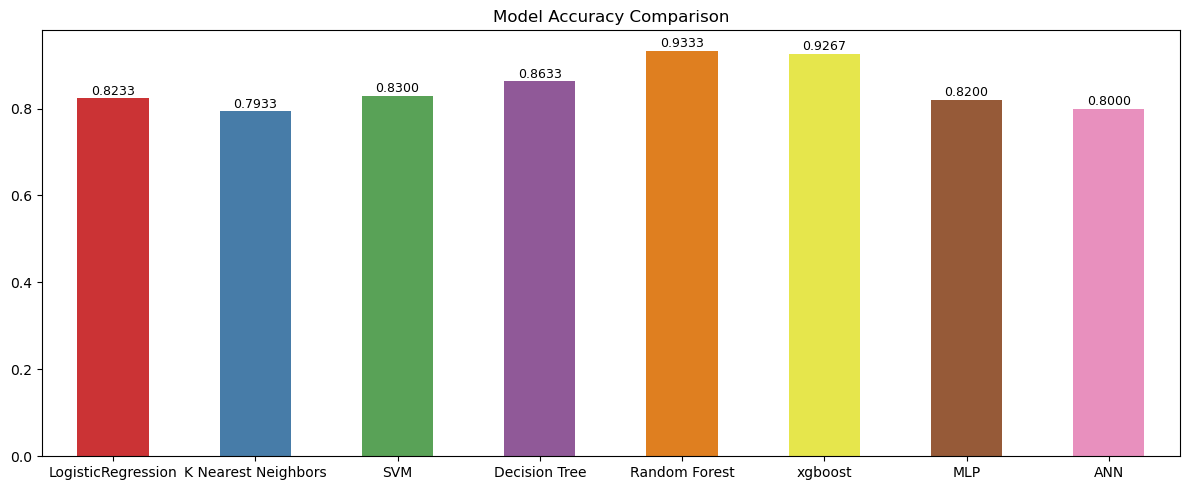

In [162]:
plt.figure(figsize=(12, 5))
bar_plot = sns.barplot(x=models, y=accuracy_scores,width=0.5, palette="Set1")
plt.title('Model Accuracy Comparison')

# Add labels to the top of each bar
for index, value in enumerate(accuracy_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


1. **Best Performing Model**:
   - **XGBoost** achieved the highest accuracy of **92.67%**, making it the most effective model in this comparison. It suggests that XGBoost is well-suited for the data and captures its patterns efficiently.

2. **Second Best Model**:
   - **Random Forest** is the second-best model, with an accuracy of **92.00%**. It is only slightly behind XGBoost, indicating that ensemble methods work well for this dataset.

3. **Moderate Performing Models**:
   - **Decision Tree** (83.67%) and **SVM** (83.00%) show moderate performance, indicating their ability to handle the dataset but with room for improvement compared to ensemble methods.
   - **Logistic Regression** achieves an accuracy of **82.33%**, showcasing strong performance for a simpler linear model.

4. **Lower Accuracy Models**:
   - **ANN (Artificial Neural Network)** and **MLP (Multi-Layer Perceptron)** both achieved **82.00%**, slightly lagging behind Random Forest and XGBoost. This suggests that the dataset might not be complex enough to leverage the full potential of these models.

5. **Least Performing Model**:
   - **K-Nearest Neighbors (KNN)** has the lowest accuracy of **79.33%**, possibly due to its sensitivity to the dataset's structure, feature scaling.
  
---

# Q3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees.  



#### Answer:  

The above **Model Accuracy Comparison Graph** highlights the performance of various models trained to predict employee performance based on relevant input factors. Among these, **XGBoost** (accuracy: 0.9267) and **Random Forest** (accuracy: 0.9200) demonstrate superior accuracy, indicating their ability to make precise predictions. These models are well-suited for complex datasets, where multiple variables interact to influence outcomes.

**XGBoost**, in particular, emerges as the best-performing model, slightly surpassing others in accuracy. XGBoost excels in handling missing data, managing feature interactions, and mitigating overfitting due to its advanced regularization techniques. These capabilities make it an ideal choice for building a robust predictive system for employee performance. With such a model, HR teams can analyze various factors—like job satisfaction, environment satisfaction, and work-life balance—to estimate an employee's potential performance in a specific role.

By integrating this predictive model into the hiring process, companies can identify high-performing candidates early on, aligning hiring decisions with organizational goals. However, it’s important to ensure the model remains fair, unbiased, and adaptable. Regular validation using new employee data and fine-tuning the model will be essential to maintaining its reliability over time. Additionally, while the model can assist in decision-making, final hiring decisions should also consider human insights and interviews to provide a holistic evaluation of candidates.  

---

# Q4. Recommendations to improve the employee performance based on insights from analysis.

1. **Enhance Job Satisfaction**:  
Employee job satisfaction is a key driver of performance and retention. To improve job satisfaction, organizations should conduct regular surveys to understand the factors contributing to dissatisfaction. Address these issues by offering clear career development paths, performance-based incentives, and opportunities for professional growth. Recognizing employee contributions through awards or public acknowledgment can further motivate employees. Additionally, ensuring fair and competitive compensation aligns with their roles and responsibilities can significantly enhance their satisfaction levels and productivity.

2. **Improve Work Environment**:  
A positive and supportive work environment fosters collaboration and creativity among employees. To achieve this, organizations should invest in ergonomic office setups, ensuring physical comfort. Encourage open communication by establishing feedback systems where employees feel heard and valued. Minimizing workplace stressors such as excessive workloads or unclear expectations is also critical. Building a culture of mutual respect, inclusivity, and teamwork can create an atmosphere where employees feel safe and motivated to give their best effort.

3. **Promote Work-Life Balance**:  
Work-life balance is essential for maintaining employee well-being and performance. Organizations can support this by offering flexible working hours, remote work options, or hybrid work models to accommodate personal responsibilities. Wellness programs, such as yoga sessions, mental health support, or fitness challenges, can help employees manage stress effectively. Encouraging employees to take regular breaks and vacations without guilt will also help prevent burnout, keeping them focused and engaged over the long term.

4. **Targeted Training and Development**:  
Training employees is crucial for bridging skill gaps and preparing them for evolving job roles. By analyzing performance data, organizations can identify specific areas where employees need improvement and design personalized training programs. These could include technical skills, leadership development, or time management workshops. Regularly updating training programs to align with industry trends will also ensure employees remain competitive and capable of meeting organizational goals.

5. **Employee Engagement Programs**:  
Engagement programs play a vital role in fostering loyalty and a sense of belonging among employees. Organizing team-building activities, such as outings or collaborative projects, can strengthen interpersonal relationships and morale. Managers should interact regularly with their teams to understand their challenges and aspirations. Hosting workshops, brainstorming sessions, or informal gatherings can also keep employees invested in the company’s vision and mission, ultimately improving their performance.
  
---

# Summary:

### Important Features Selected for Analysis:
In the analysis, features such as EmpJobSatisfaction, EmpEnvironmentSatisfaction, and EmpWorkLifeBalance were identified as the most critical for predicting employee performance. These features were selected due to their strong correlation with performance metrics, as observed during exploratory data analysis (EDA). High values in these attributes consistently aligned with better employee performance, making them essential indicators for evaluation.  


### Techniques and Tools Used in the Project:

1. **Data Preprocessing**:  
   - Handling missing values and outliers to ensure data consistency.  
   - Encoding categorical variables into numerical formats for model compatibility.

2. **Exploratory Data Analysis (EDA)**:  
   - Visualizations and statistical analysis to identify trends, patterns, and key factors affecting performance. Histogram for continous data and Countplot for categorical data.  

3. **Machine Learning Algorithms**:  
   - Models like **Logistic Regression**, **KNN**, **SVM**, **Decision Tree**, **Random Forest**, **XGBoost**, **MLP** and **ANN** were used to predict employee performance, with XGBoost emerging as the best-performing model.

4. **Model Evaluation Metrics**:  
   - Metrics like **accuracy**, **precision**, **recall**, and **F1-score** were employed to assess model performance comprehensively.

5. **Hyperparameter Tuning**:  
   - Grid search and manual adjustments to optimize model performance.



### Challenges Faced:

One of the main challenges encountered during the development of the **ANN model** was related to the encoding of the target labels. Initially, I used the `categorical_crossentropy` function, assuming that the target labels were ready for training. However, this resulted in errors since the target column, which contained three classes, was not one-hot encoded. The `categorical_crossentropy` loss function requires the target labels to be one-hot encoded, and since the labels were in integer format, the model could not process them correctly.

To resolve this, I switched to the `sparse_categorical_crossentropy` function, which is specifically designed for multi-class classification problems where the target labels are integer-encoded. This loss function automatically handled the encoding of the target labels, allowing the model to work without any further issues. By making this adjustment, I was able to successfully compile and train the ANN model.  

---

# Final Conclusion:

This project aimed to predict **employee performance** based on key factors such as **job satisfaction**, **work environment**, and **work-life balance**. Through detailed data analysis and machine learning techniques, the project revealed how these factors significantly influence employee performance, offering valuable insights for enhancing organizational decision-making.

Key findings indicated that **job satisfaction**, **work environment satisfaction**, and **work-life balance** are the most critical factors affecting performance. Employees who find their job fulfilling, work in a supportive environment, and maintain a healthy balance between work and personal life are more likely to perform at higher levels. These insights were supported by a combination of data preprocessing, exploratory analysis, and model evaluation.

The **XGBoost model** was identified as the best-performing model, demonstrating high accuracy in predicting employee performance. This reinforces the potential of machine learning to uncover complex patterns in employee data, enabling more informed decisions in hiring and performance management.  

---


# References:
Blogs

Towards Data Science: Guides on XGBoost and feature selection (towardsdatascience.com).  
Machine Learning Mastery by Jason Brownlee (machinelearningmastery.com).